## Importing Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Scikit-Learn : Contains various classification, regression and clustering algorithms

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus
from IPython.display import Image
from subprocess import call
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsRegressor

## Importing Cleaned Dataset "sales_Cleaned_v3"

In [2]:
sales_Df = pd.read_csv('sales_Cleaned_v3.csv')
sales_Df.head()

,BRANDS,COLORS,MEMORY,STORAGE,RATING,SELLING_PRICE,ORIGINAL_PRICE,DISCOUNT,DISCOUNT_PERCENTAGE
0,SAMSUNG,BLACK,8_GB,128_GB,4.3,19330,20999,1669,7.947998
1,NOKIA,GREY,2_GB,16_GB,3.8,10199,10199,0,0.000000
2,INFINIX,BLUE,4_GB,64_GB,4.2,12999,12999,0,0.000000
3,APPLE,BLACK,4_GB,64_GB,4.6,49900,49900,0,0.000000
4,GIONEE,BLACK,LESS_THAN_1GB,LESS_THAN_1GB,4.0,2199,2199,0,0.000000


In [3]:
sales_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BRANDS               2897 non-null   object 
 1   COLORS               2897 non-null   object 
 2   MEMORY               2897 non-null   object 
 3   STORAGE              2897 non-null   object 
 4   RATING               2897 non-null   float64
 5   SELLING_PRICE        2897 non-null   int64  
 6   ORIGINAL_PRICE       2897 non-null   int64  
 7   DISCOUNT             2897 non-null   int64  
 8   DISCOUNT_PERCENTAGE  2897 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 203.8+ KB


## Brief Summary of Data

Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `9` variables/features/columns and `2897` observations/samples/rows in the dataset.    
* The response variable seems to be `RATING`, while the remaining 8 are most likely predictors.
* There are `2` variables identified as `float64` by default, and it seems they are indeed Numeric.
* There are `3` variables identified as `int64` by default, and it seems they are indeed Numeric.
* There are `4` variables identified as `object` by default, and they are most likely Categorical.      
* None of the variables/features seem to have any missing value, as the data has been cleaned prior.

## Exploratory Data Analysis
### Exploring Response Variable `RATING`

In [4]:
sales_Df['RATING'].describe()

count    2897.000000
mean        4.241319
std         0.272841
min         2.300000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: RATING, dtype: float64

<Axes: >

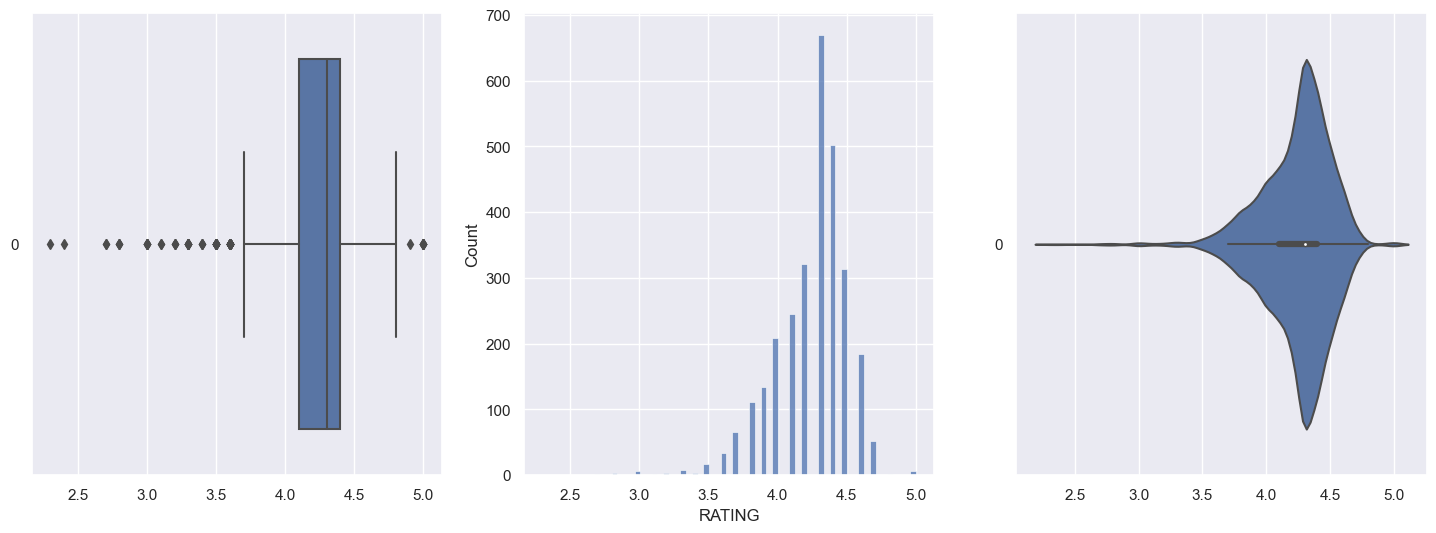

In [5]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sb.boxplot(data = sales_Df['RATING'], orient = "h", ax = axes[0])
sb.histplot(data = sales_Df['RATING'], ax = axes[1]) 
sb.violinplot(data = sales_Df['RATING'], orient = "h", ax = axes[2])

`RATING`
* Median of 4.3
* Standard Deviation of 0.27 is rather small so data is not very spread out. This can also be seen from the violin plot and histogram where most of the data is clustered around 4.3
* Minimum is 2.3 and Maximum is 5 which tells us that even if the data is not spread out, it has outliers. Since these outliers are a natural part of the dataset and are not caused by errors, we decided to not remove them

### Exploring Predictor Variables
#### Numeric: `SELLING_PRICE`, `ORIGINAL_PRICE`, `DISCOUNT`, `DISCOUNT_PERCENTAGE`
#### Categorical: `BRANDS`, `COLORS`, `MEMORY`, `STORAGE`

In [6]:
# Numeric Predictors
sales_Df[['SELLING_PRICE','ORIGINAL_PRICE','DISCOUNT', 'DISCOUNT_PERCENTAGE']].describe()

,SELLING_PRICE,ORIGINAL_PRICE,DISCOUNT,DISCOUNT_PERCENTAGE
count,2897.000000,2897.000000,2897.000000,2897.000000
mean,24692.492233,26656.677943,1964.185709,6.222417
std,26373.592602,28251.233298,5505.394873,11.353050
min,1000.000000,1000.000000,-8000.000000,-160.320641
25%,9990.000000,10389.000000,0.000000,0.000000
50%,14999.000000,16300.000000,0.000000,0.000000
75%,27499.000000,29999.000000,2000.000000,9.836388
max,179900.000000,189999.000000,75000.000000,70.610305


In [7]:
# Categorical Predictors
sales_Df[['BRANDS','COLORS', 'MEMORY', 'STORAGE']].describe()

,BRANDS,COLORS,MEMORY,STORAGE
count,2897,2897,2897,2897
unique,17,13,10,11
top,SAMSUNG,BLACK,4_GB,64_GB
freq,685,996,840,757


Summary thus far, factoring in domain knowledge we know:

NUMERIC PREDICTORS:

* `SELLING_PRICE` seems to be in Indian Rupees, and the mean is around INR24,692, while the min and max are INR1,000 and INR179,900 respectively. 
* `ORIGINAL_PRICE` seems to be in Indian Rupees, and the mean is around INR26,656, while the min and max are INR1,000 and INR189,999 respectively.
* `DISCOUNT`seems to be in Indian Rupees, and the mean is around INR1,964, while the min and max are INR-8,000 and INR75,000 respectively. Negative values in min denotes `SELLING_PRICE` of phone is higher than `ORIGINAL_PRICE` of phone.
* `DISCOUNT_PERCENTAGE`seems to be in Indian Rupees, and the mean is around 6%, while the min and max are -160% and 70% respectively. Negative values in min denotes `SELLING_PRICE` of phone is higher than `ORIGINAL_PRICE` of phone.

CATEGORICAL PREDICTORS:
* `BRANDS` has 17 levels, with the majority (685) being `SAMSUNG`.
* `COLORS` has 13 levels, with the majority (996) being `BLACK`.
* `MEMORY` has 16 levels, with the majority (840) being `4_GB`.
* `STORAGE` has 16 levels, with the majority (757) being `64_GB`.

### Correlation between NUMERIC Predictors and `RATING`
* Correlation Matrix
* Heatmap of Correlation Matrix

                       RATING  SELLING_PRICE  ORIGINAL_PRICE  DISCOUNT  \
RATING               1.000000       0.458876        0.450786  0.114989   
SELLING_PRICE        0.458876       1.000000        0.982026  0.248822   
ORIGINAL_PRICE       0.450786       0.982026        1.000000  0.427157   
DISCOUNT             0.114989       0.248822        0.427157  1.000000   
DISCOUNT_PERCENTAGE  0.054372      -0.036126        0.095281  0.661998   

                     DISCOUNT_PERCENTAGE  
RATING                          0.054372  
SELLING_PRICE                  -0.036126  
ORIGINAL_PRICE                  0.095281  
DISCOUNT                        0.661998  
DISCOUNT_PERCENTAGE             1.000000  


<Axes: >

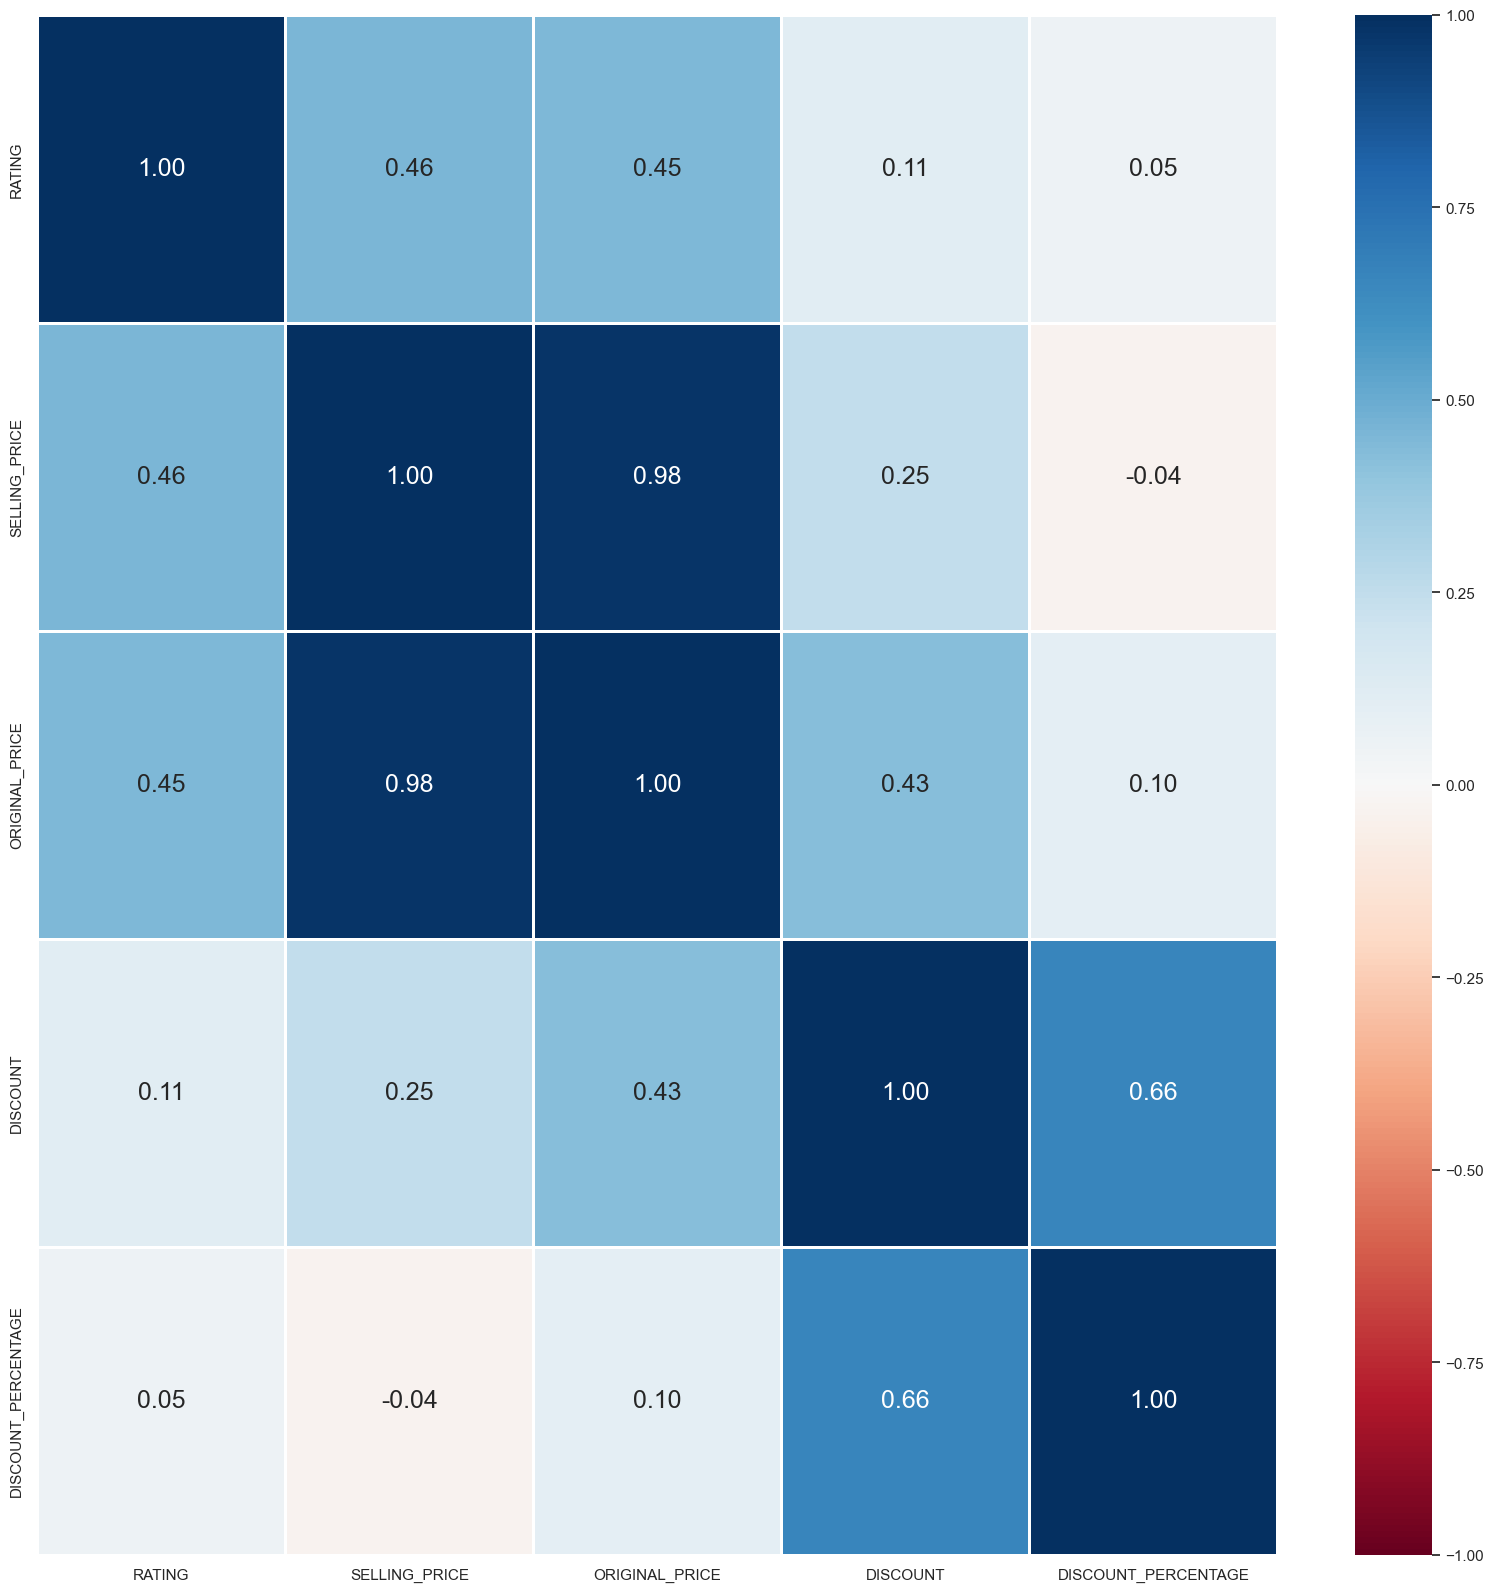

In [8]:
sales_Numeric_Df = pd.DataFrame(sales_Df[["RATING", "SELLING_PRICE","ORIGINAL_PRICE", "DISCOUNT", "DISCOUNT_PERCENTAGE"]])

# Correlation Matrix
print(sales_Numeric_Df.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(sales_Numeric_Df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

##### Insights gathered from heatmap of correlation matrix
* `ORIGINAL_PRICE` and `SELLING_PRICE` have almost the same correlation with `RATING`. Initially, we thought that just one of these variables would be sufficient for ML models later to predict `RATING`. However, when we trained the ML models using the dataset that contained both variables, the Feature Importance was significantly different for both variables. As a result, we decided to keep both variables. More on this later.

* `SELLING_PRICE` and `ORIGINAL_PRICE` have a very high correlation with each other. This is expected since `SELLING_PRICE` is `ORIGIANL_PRICE` minus `DISCOUNT`. The same can be said about `DISCOUNT` and `DISCOUNT_PERCENTAGE` as one is derived from the other.

* `DISCOUNT` and `ORIGINAL_PRICE` seem to have a decently strong positive correlation but weirdly `DISCOUNT_PERCENTAGE` and `ORIGINAL_PRICE` have a very low positive correlation even though `DISCOUNT` and  `ORIGINAL_PRICE` is used to calculate `DISCOUNT_PERCENTAGE`

* `DISCOUNT` and `DISCOUNT_PERCENTAGE` have a very low correlation with `RATING`

### Correlation between CATEGORICAL Predictors and `RATING` before ENCODING
* BRANDS vs RATING
* COLORS vs RATING
* MEMORY vs RATING
* STORAGE vs RATING

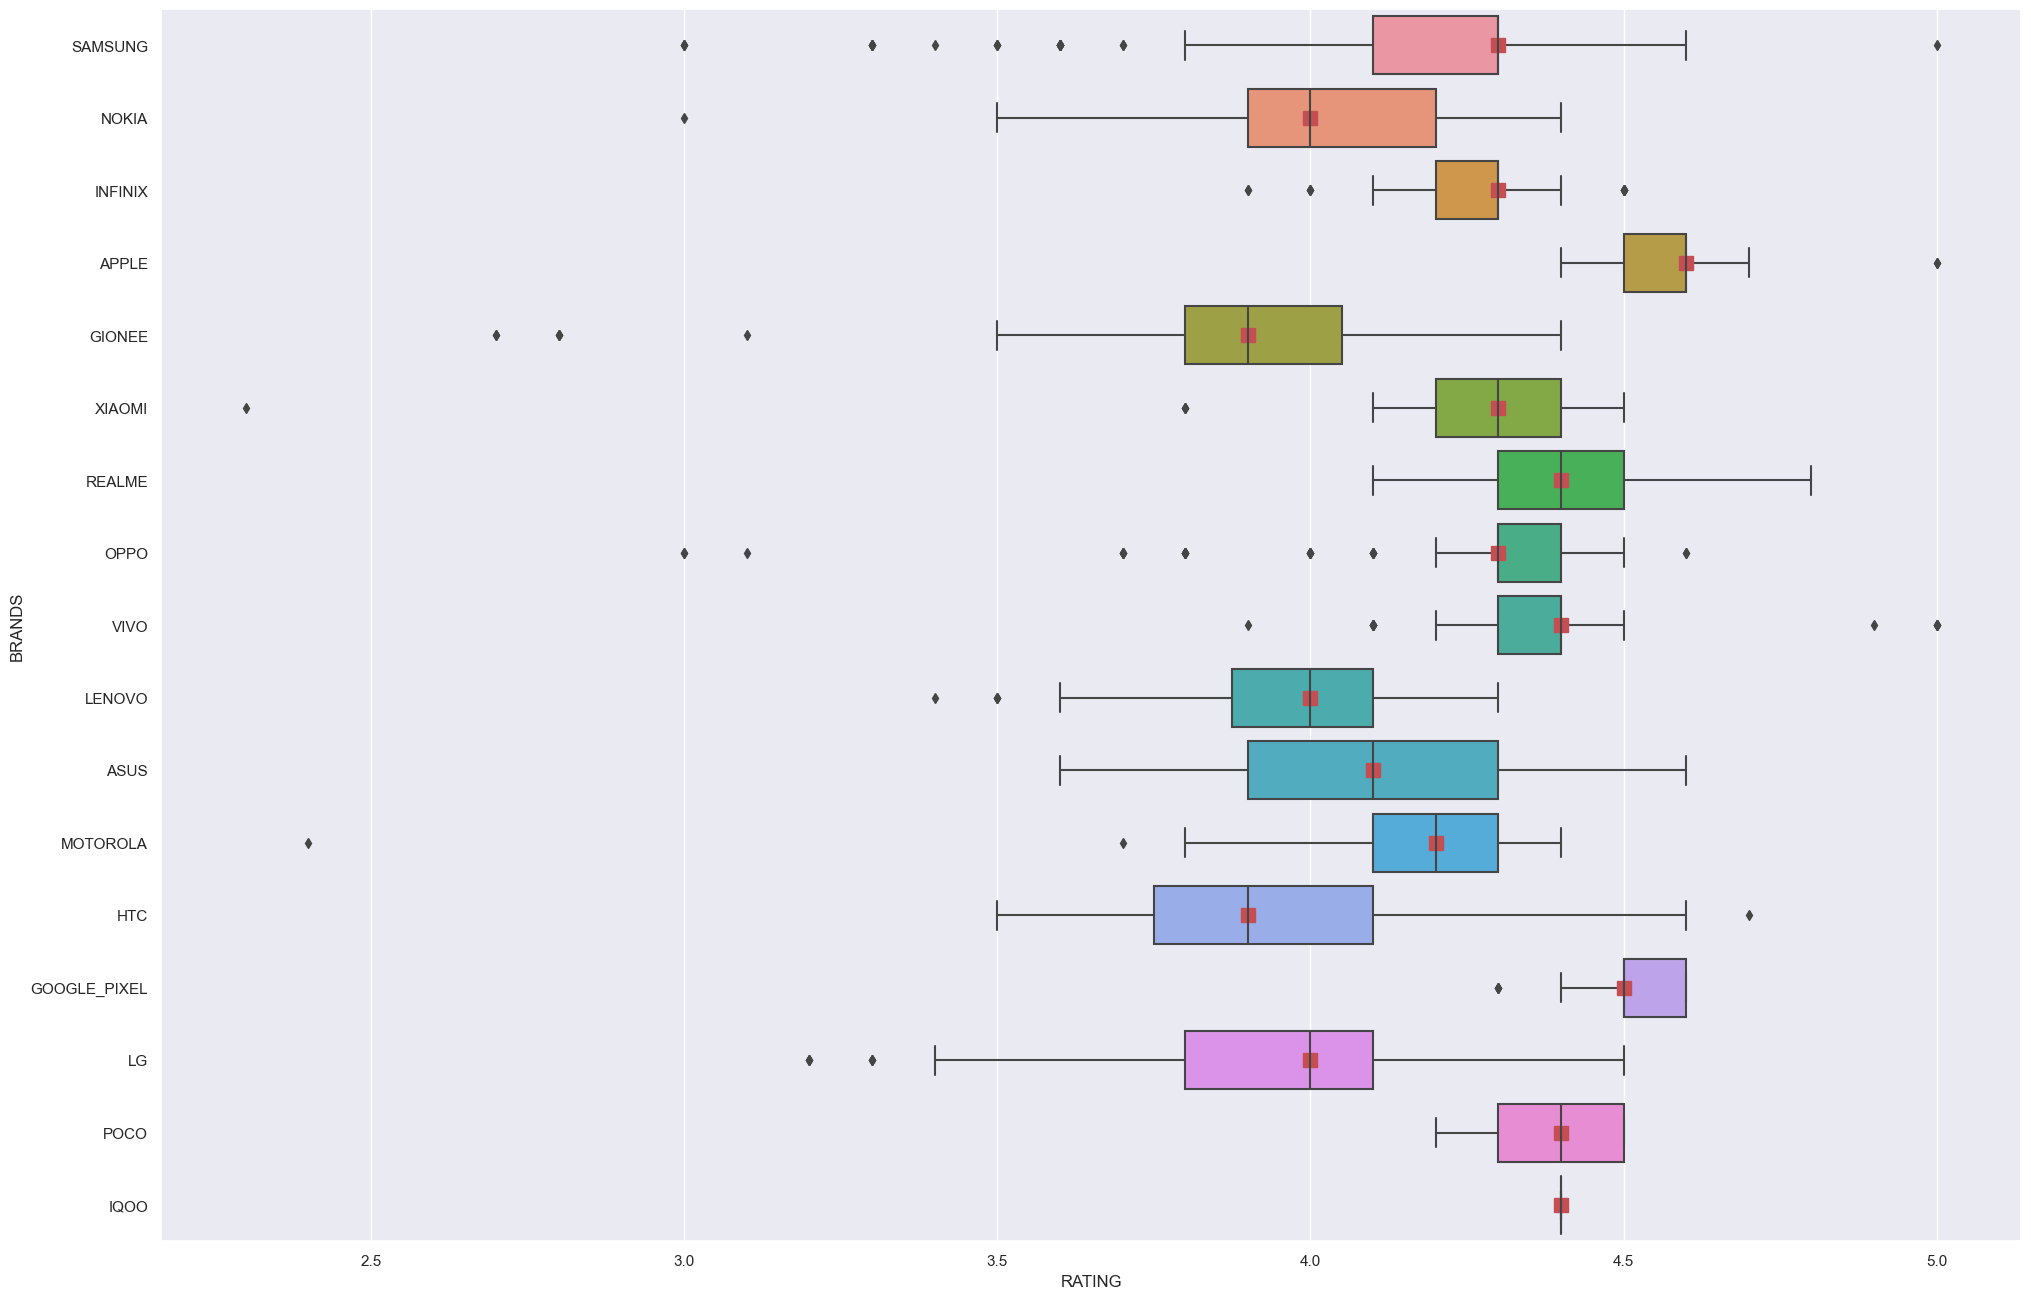

In [9]:
#Boxplot for BRANDS vs RATING

median = sales_Df.groupby('BRANDS')['RATING'].median().reset_index() 

# Plot the boxplot
f = plt.figure(figsize=(24, 16))
sb.boxplot(x="RATING", y="BRANDS", data=sales_Df)

# Create a mapping between categories and their positions
category_positions = {category: pos for pos, category in enumerate(sales_Df['BRANDS'].unique())}

# Plot the median points
for i, row in median.iterrows():
    category = row['BRANDS']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`BRANDS`
* There seems to be skewed normal distributions for some of the brands such as `SAMSUNG` and `APPLE`
* `APPLE` seems to have the highest median rating of >4.5
* `GIONEE` and `HTC` seem to have the lowest median rating of <4.0

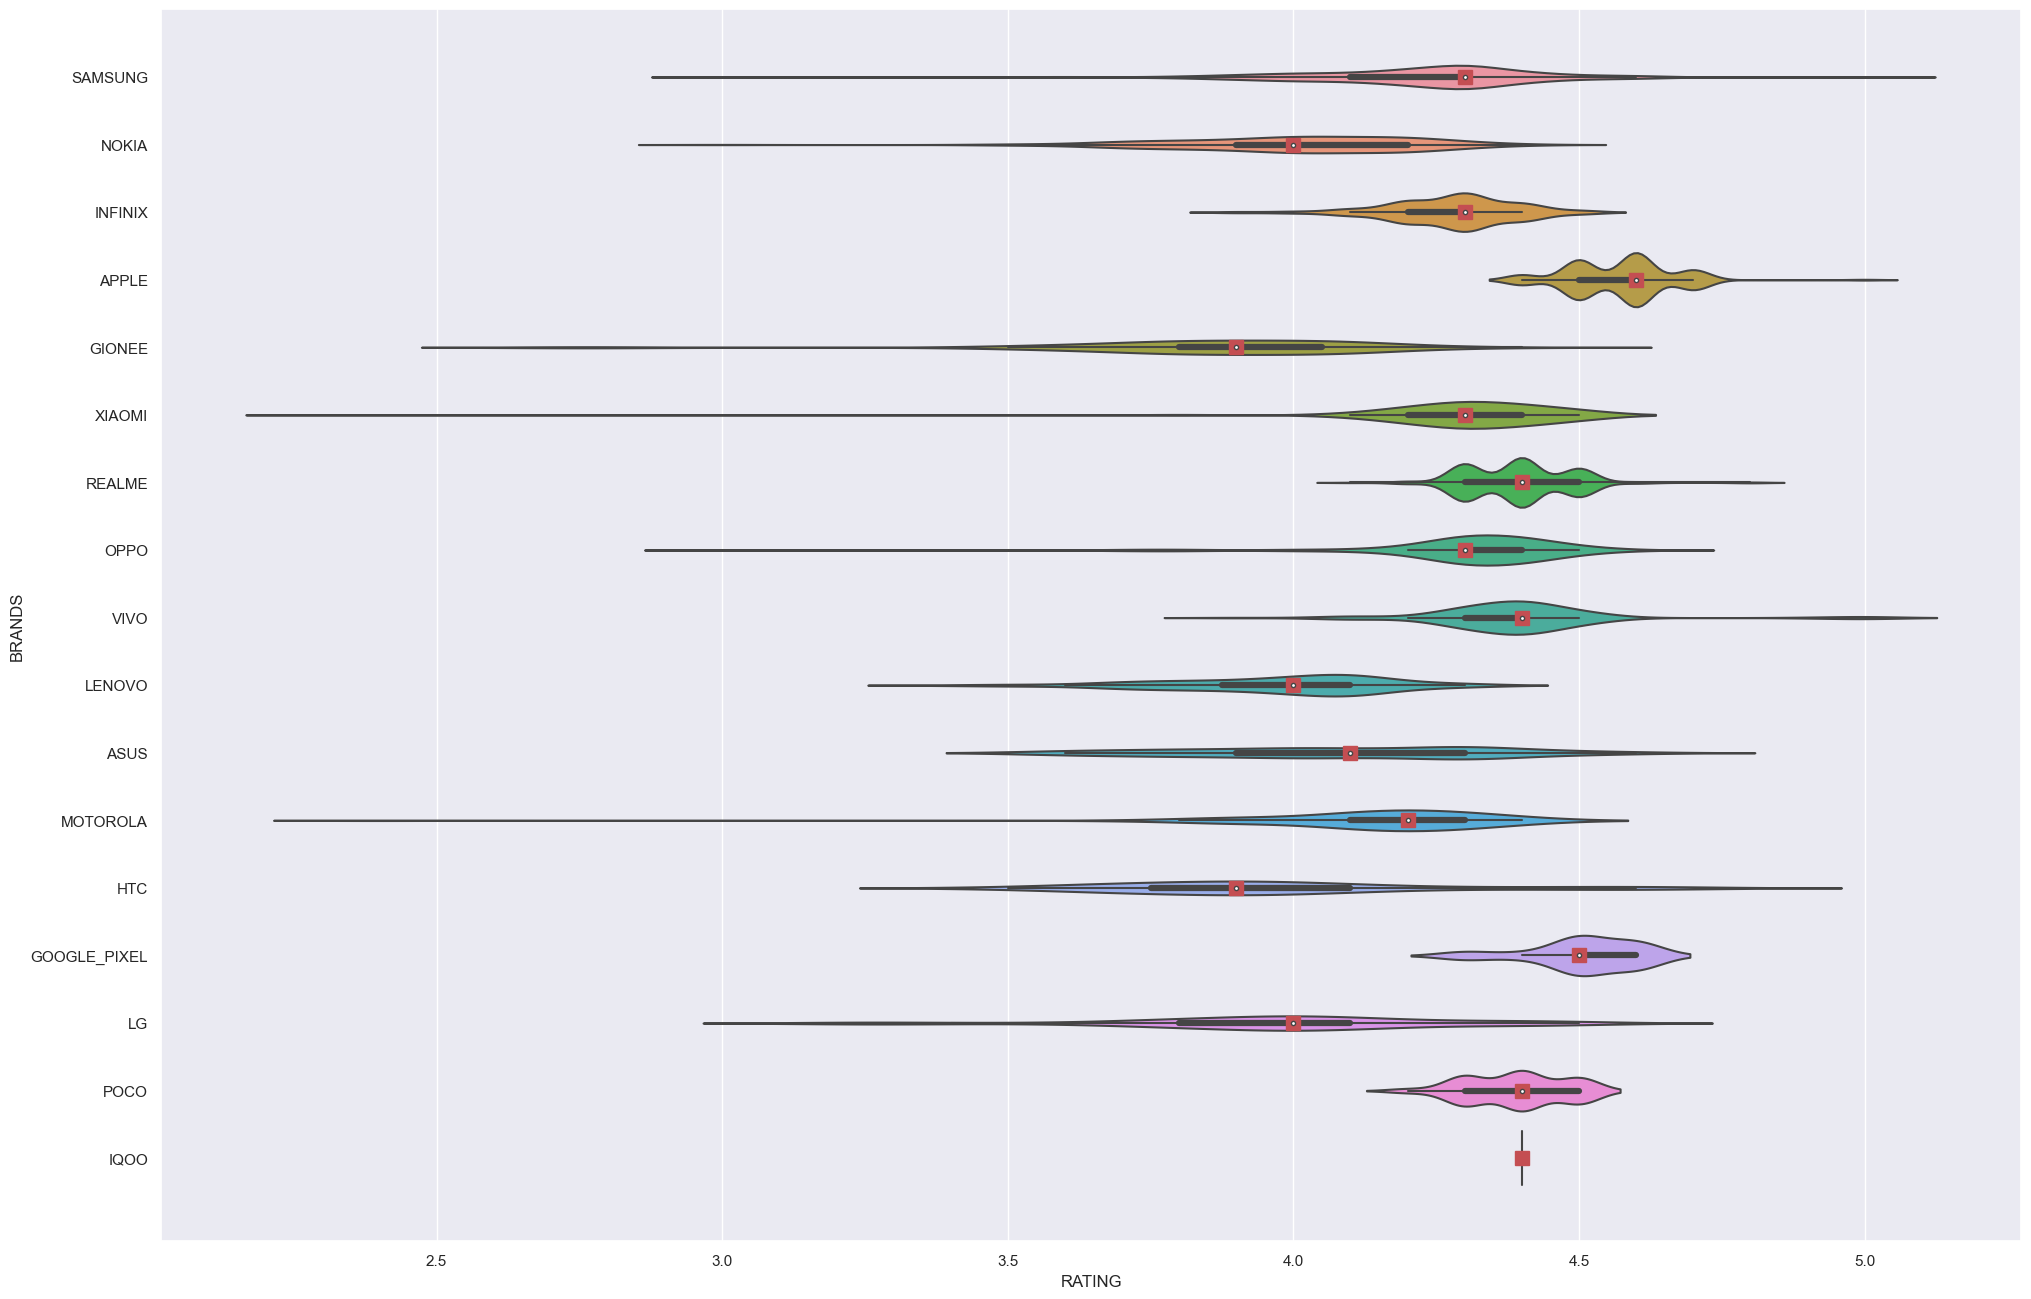

In [10]:
#Violin plot for BRANDS vs RATING

# Calculate median ratings for each brand
median = sales_Df.groupby('BRANDS')['RATING'].median().reset_index()

# Plot the violinplot
plt.figure(figsize=(24, 16))
sb.violinplot(x="RATING", y="BRANDS", data=sales_Df)

# Create a mapping between categories and their positions
category_positions = {category: pos for pos, category in enumerate(sales_Df['BRANDS'].unique())}

# Plot the median points
for i, row in median.iterrows():
    category = row['BRANDS']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`BRANDS`
* The skewed normal distributions are clearer in the violin plots as for some brands, one of the tails is longer than the other
* Rating values for `SAMSUNG` are very spread out unlike `APPLE`

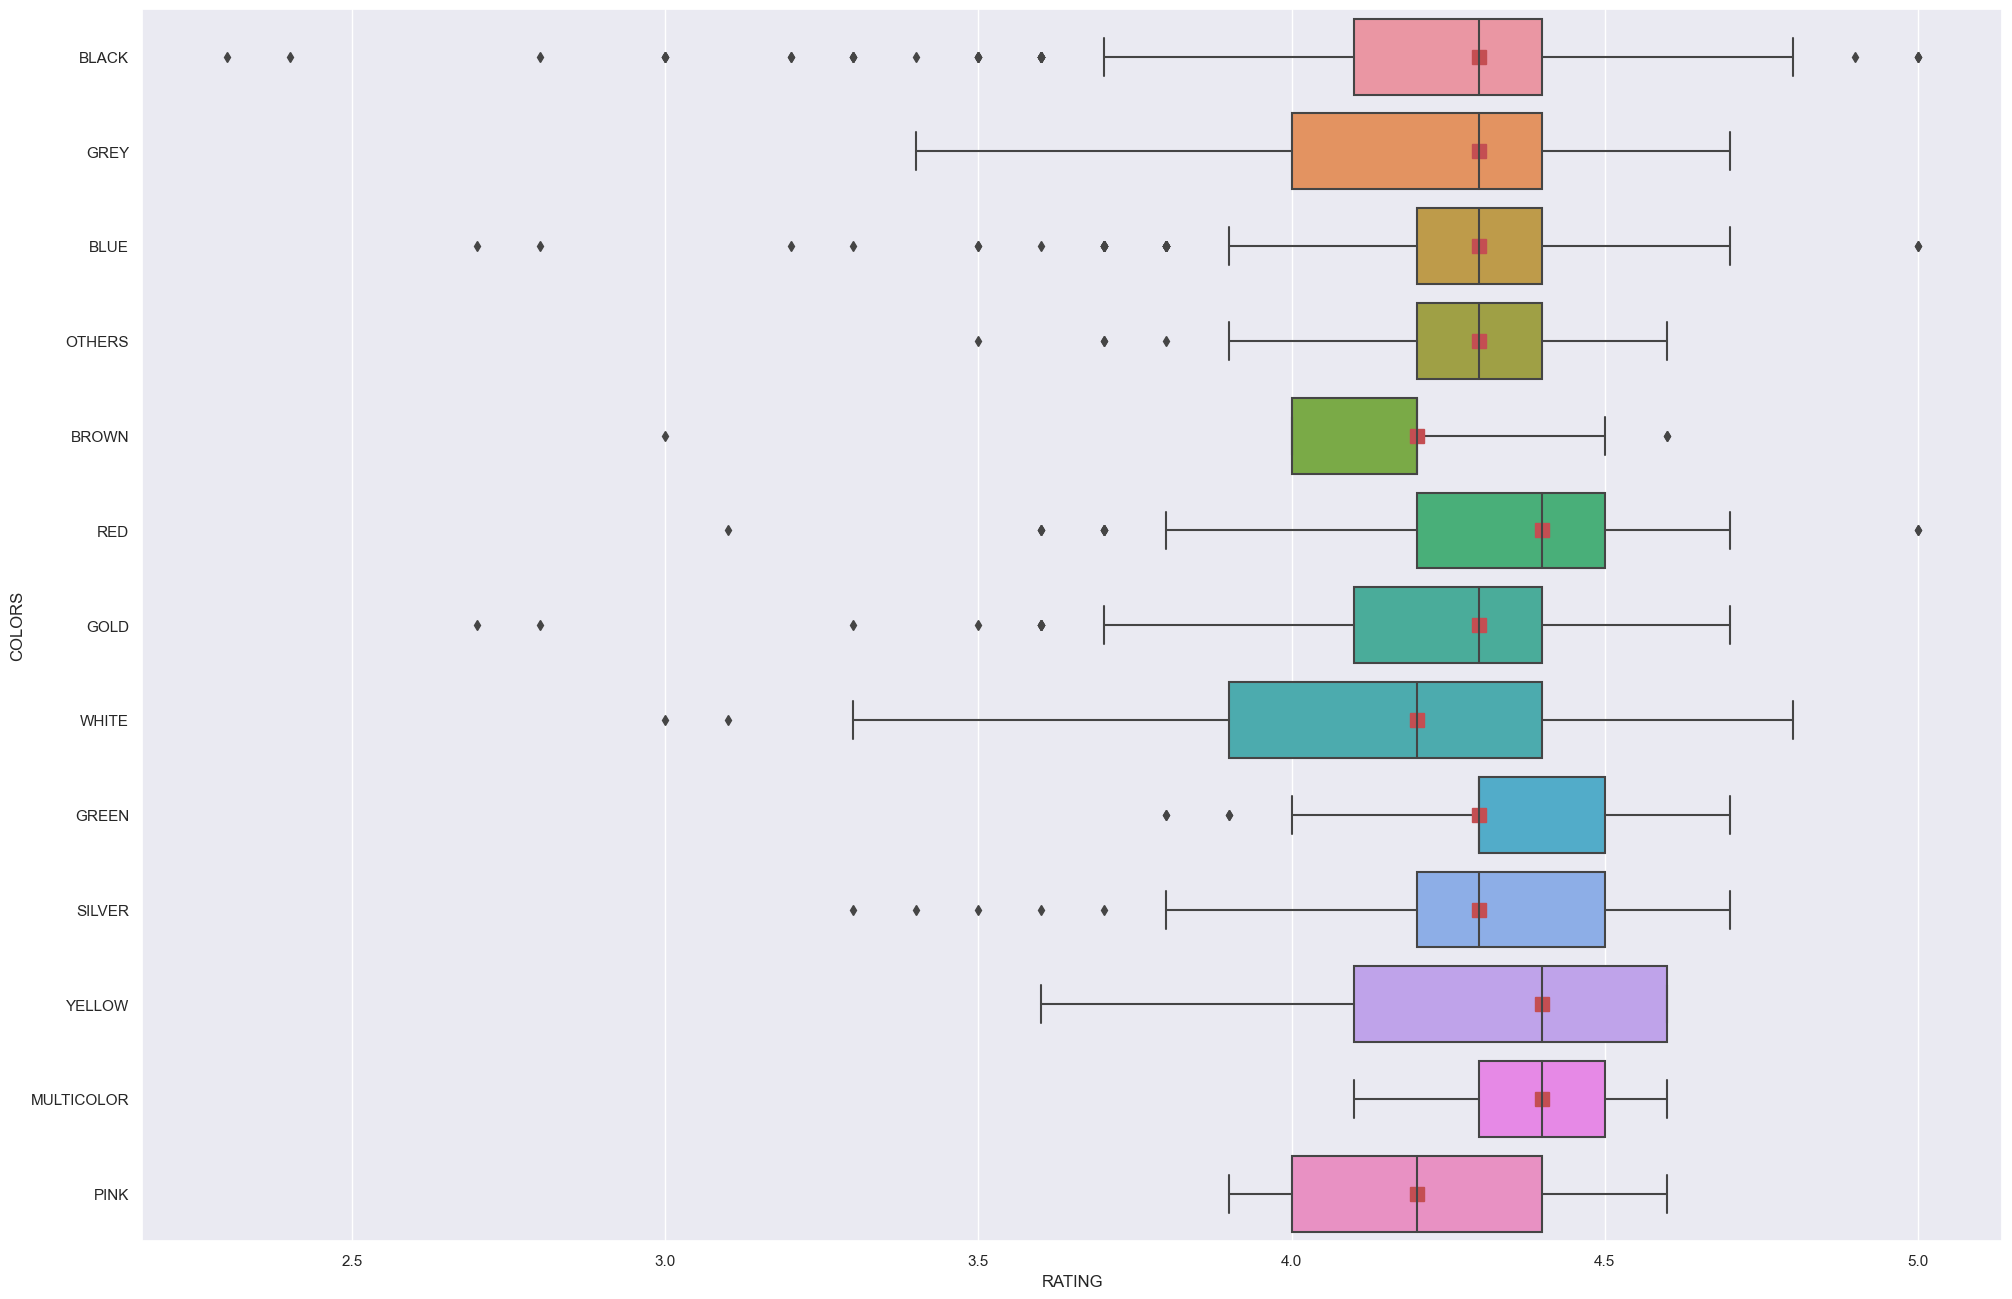

In [11]:
# COLORS vs RATING
median = sales_Df.groupby('COLORS')['RATING'].median().reset_index() 

# Plot the boxplot
f = plt.figure(figsize=(24, 16))
sb.boxplot(x="RATING", y="COLORS", data=sales_Df)

# Create a mapping between categories and their positions
category_positions = {category: pos for pos, category in enumerate(sales_Df['COLORS'].unique())}

# Plot the median points
for i, row in median.iterrows():
    category = row['COLORS']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`COLORS`
* There seems to be skewed normal distributions for some of the colors such as `BLACK` and `GREY`
* `RED`, `YELLOW` and `MULTICOLOR` seem to have the highest median rating of ~4.4
* `BROWN`, `WHITE` and `PINK` seem to have the lowest median rating of ~4.2

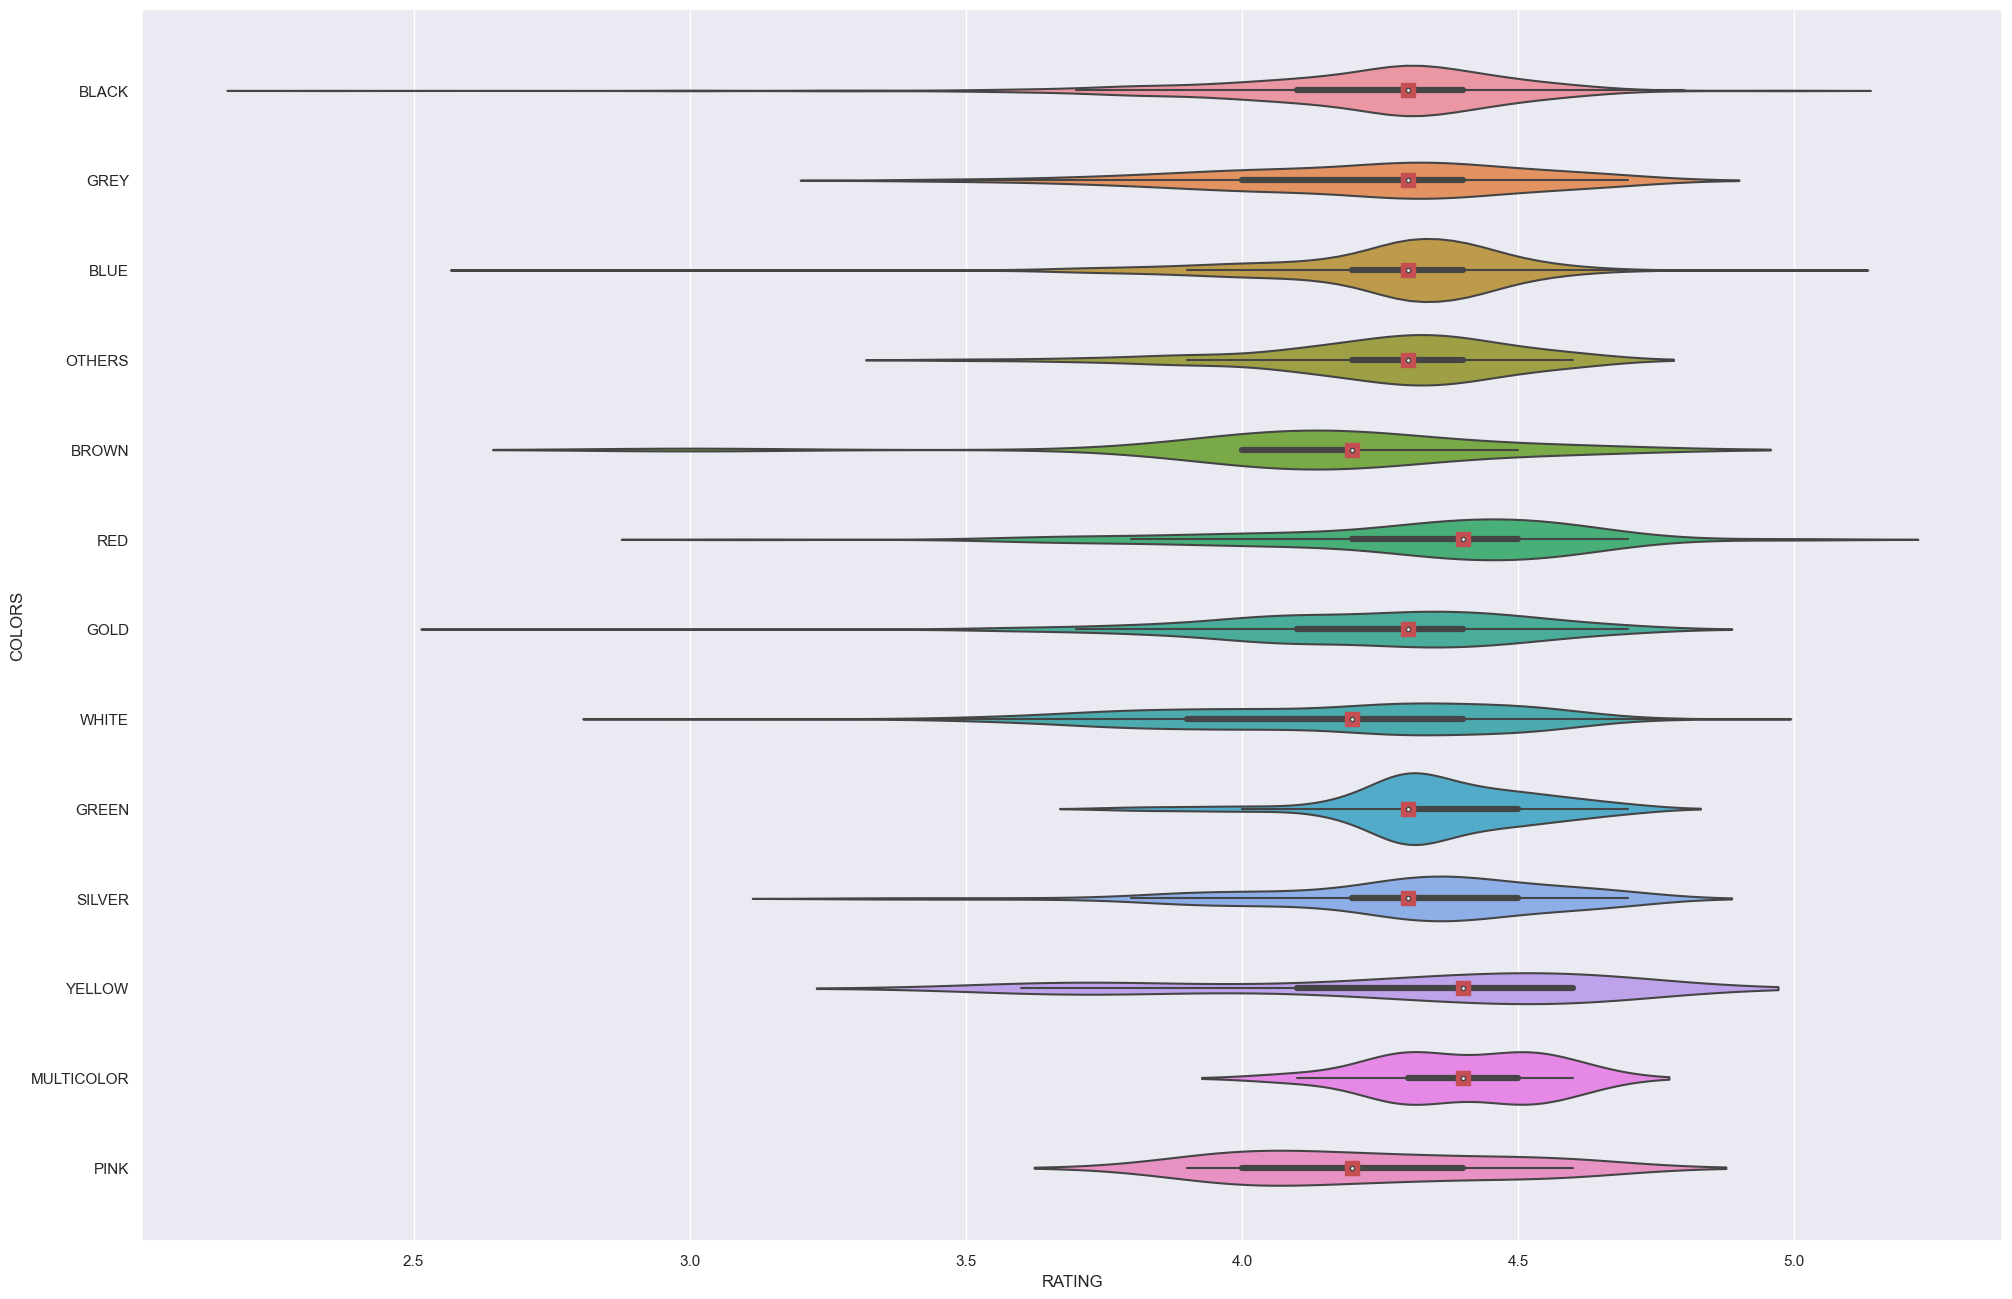

In [12]:
#Violin plot for COLORS vs RATING

# Calculate median ratings for each color
median = sales_Df.groupby('COLORS')['RATING'].median().reset_index()

# Plot the violinplot
plt.figure(figsize=(24, 16))
sb.violinplot(x="RATING", y="COLORS", data=sales_Df)

# Create a mapping between categories and their positions
category_positions = {category: pos for pos, category in enumerate(sales_Df['COLORS'].unique())}

# Plot the median points
for i, row in median.iterrows():
    category = row['COLORS']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`COLORS`
* The skewed normal distributions are clearer in the violin plots as for some brands, one of the tails is longer than the other
* Rating values for `BLACK` are very spread out unlike `MULTICOLOR` or `GREEN`

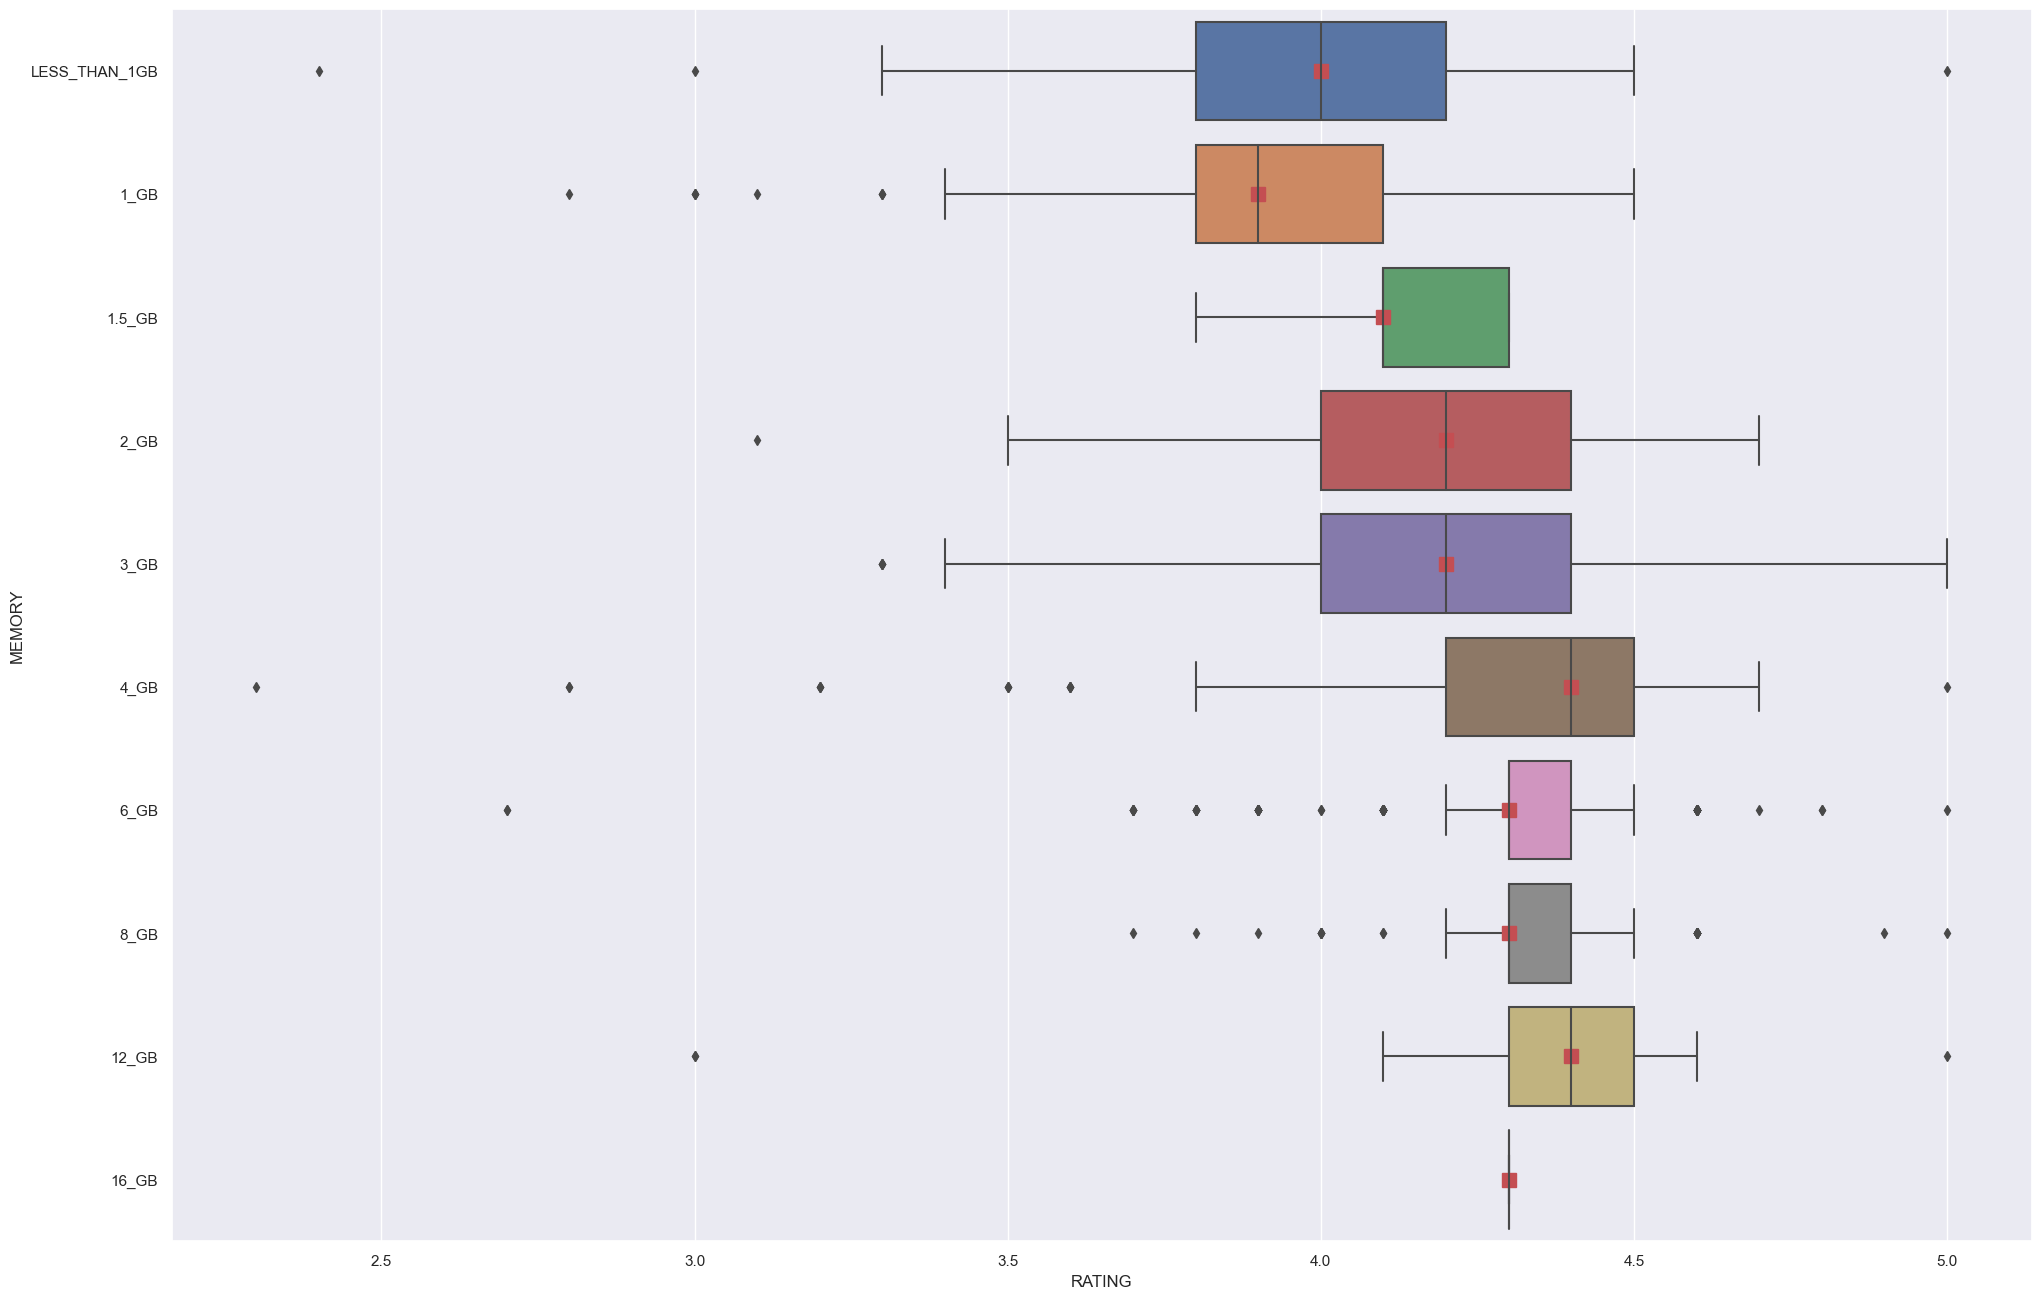

In [13]:
median = sales_Df.groupby('MEMORY')['RATING'].median().reset_index() 

# Define the custom order for MEMORY types
memory_order = ['LESS_THAN_1GB', '1_GB','1.5_GB', '2_GB', '3_GB','4_GB', '6_GB', '8_GB', '12_GB', '16_GB' ]

# Plot the boxplot with the specified order
plt.figure(figsize=(24, 16))
sb.boxplot(x="RATING", y="MEMORY", data=sales_Df, order=memory_order)

# Create a mapping between categories and their positions based on the specified order
category_positions = {category: pos for pos, category in enumerate(memory_order)}

# Plot the median points
for i, row in median.iterrows():
    category = row['MEMORY']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`MEMORY`
* It seems that a higher `MEMORY` is associated with higher `RATING`
* `LESS_THAN_1GB` and `1_GB` seem to have lower median ratings than all the other memory types

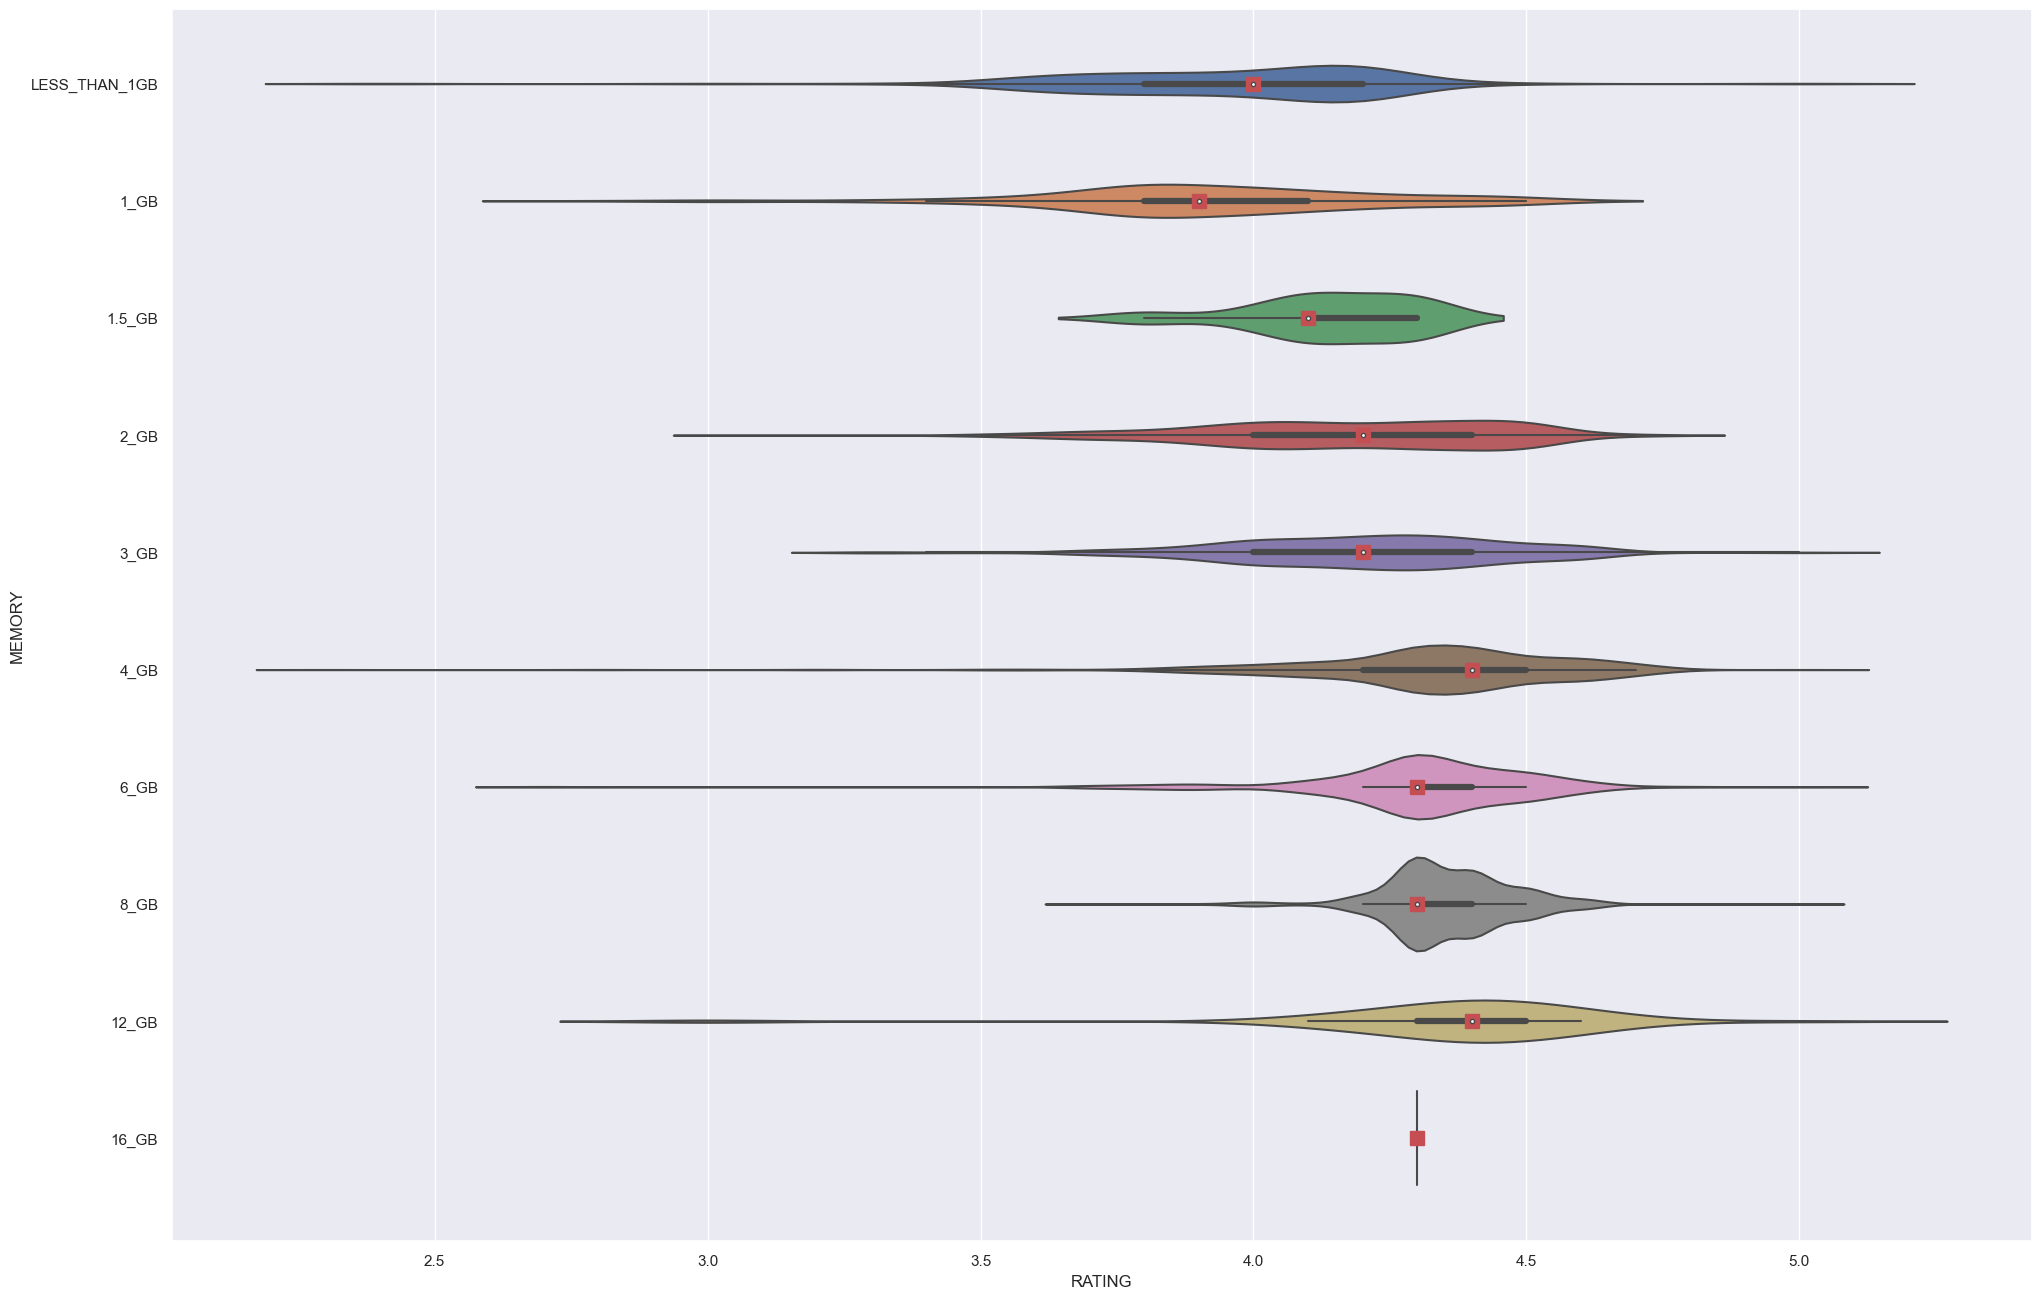

In [14]:
# Define the custom order for MEMORY types
memory_order = ['LESS_THAN_1GB', '1_GB', '1.5_GB', '2_GB', '3_GB', '4_GB', '6_GB', '8_GB', '12_GB', '16_GB']

# Plot the violin plot with the specified order
plt.figure(figsize=(24, 16))
sb.violinplot(x="RATING", y="MEMORY", data=sales_Df, order=memory_order)

# Create a mapping between categories and their positions based on the specified order
category_positions = {category: pos for pos, category in enumerate(memory_order)}

# Calculate median ratings for each memory
median = sales_Df.groupby('MEMORY')['RATING'].median().reset_index()

# Plot the median points
for i, row in median.iterrows():
    category = row['MEMORY']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`MEMORY`
* Some memory types such as `LESS_THAN_1GB` and `4_GB` have ratings that are very widely spread out

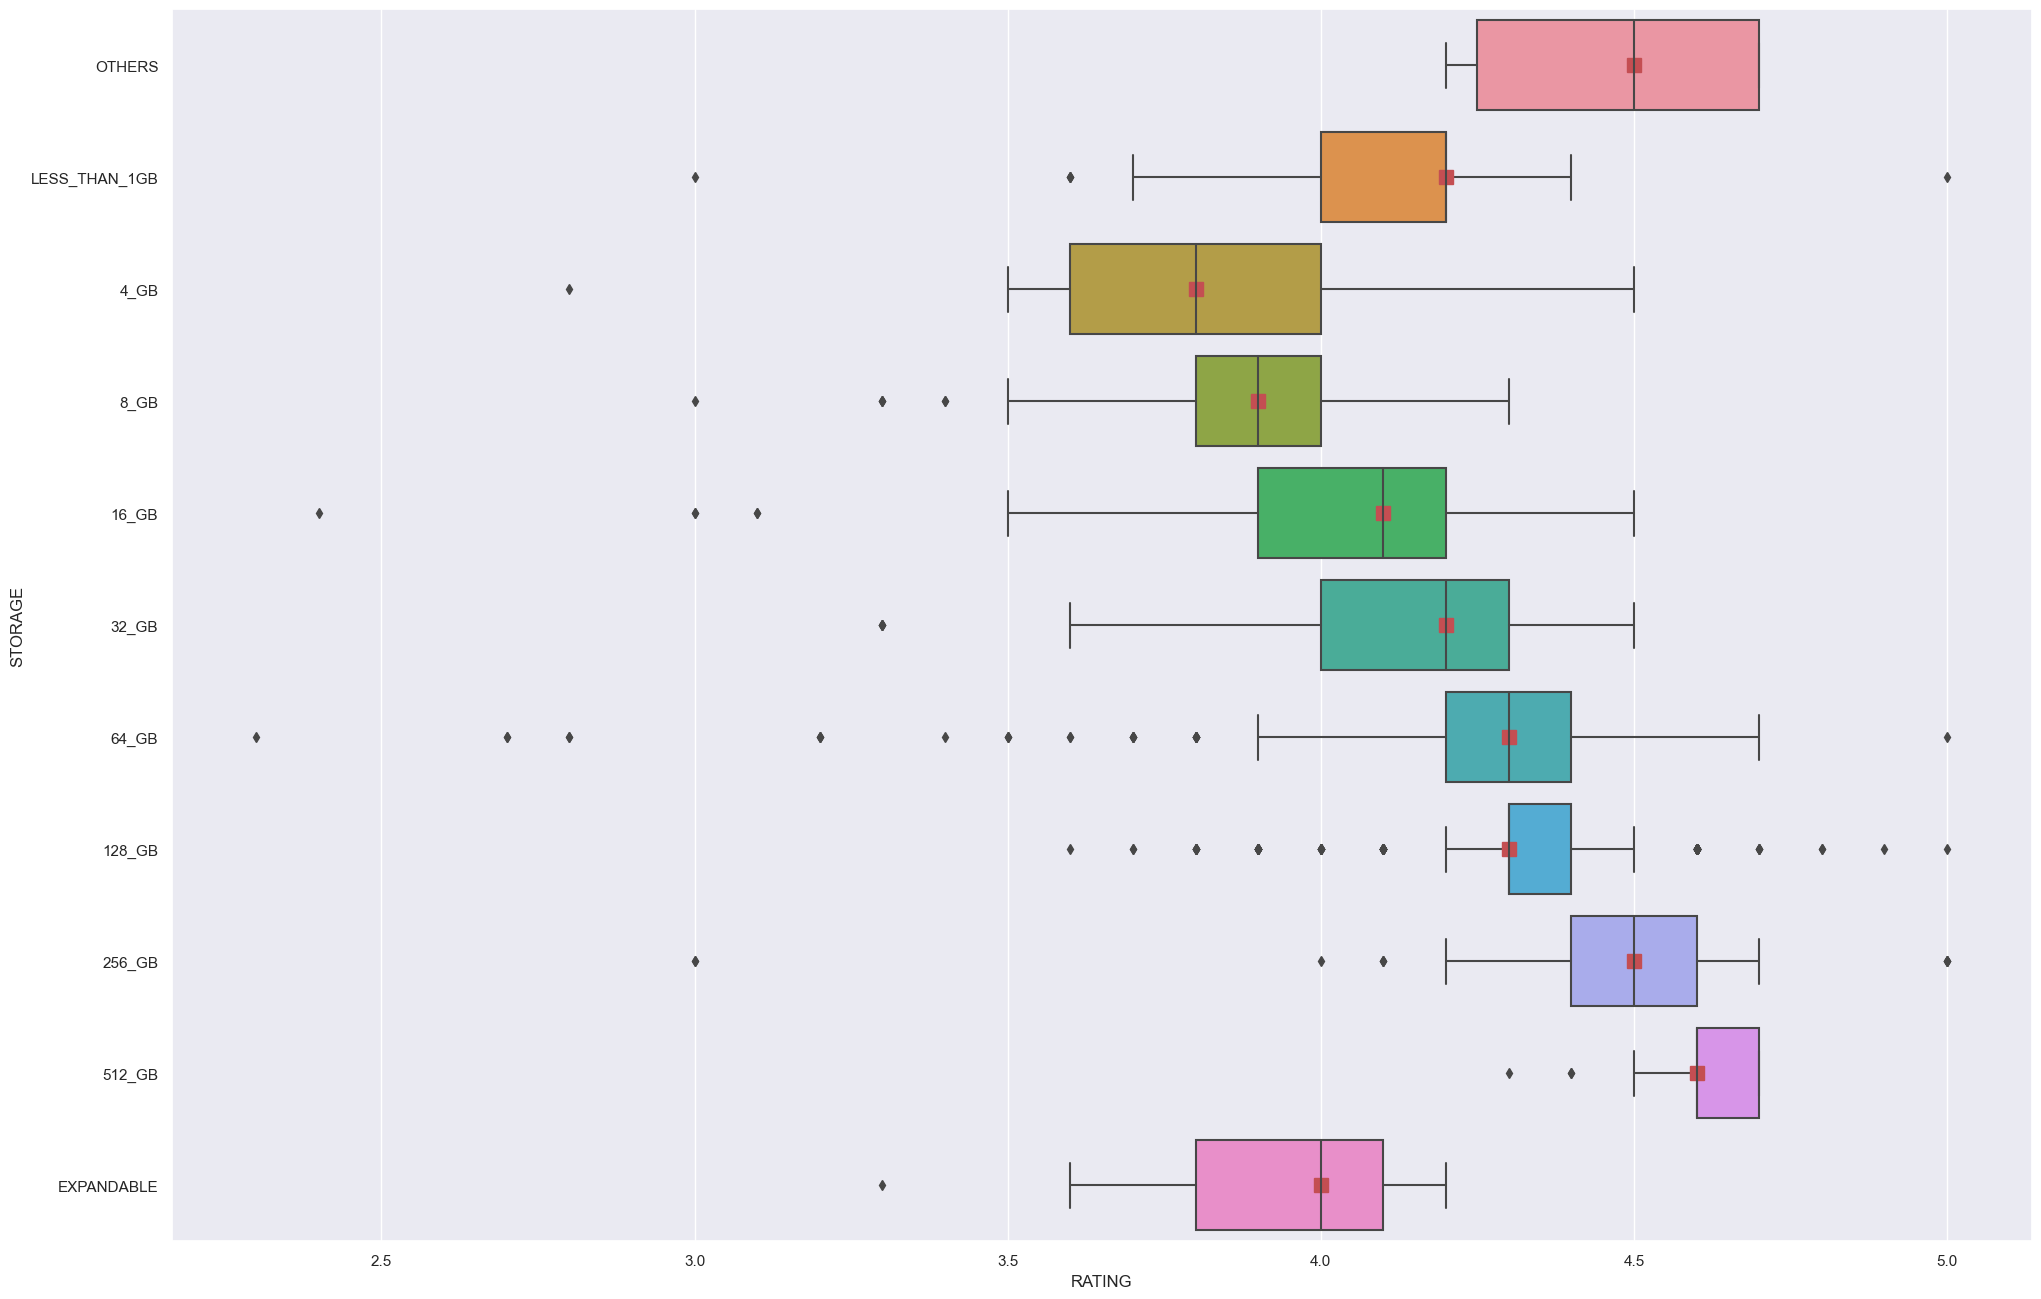

In [15]:
# Calculate median ratings for each brand
median = sales_Df.groupby('STORAGE')['RATING'].median().reset_index()

# Define the order of boxplots for each unique STORAGE type
storage_order = ['OTHERS','LESS_THAN_1GB','4_GB', '8_GB', '16_GB', '32_GB', '64_GB', '128_GB', '256_GB', '512_GB', 'EXPANDABLE']

# Plot the boxplot with specified order
plt.figure(figsize=(24, 16))
sb.boxplot(x="RATING", y="STORAGE", data=sales_Df, order=storage_order)

# Create a mapping between categories and their positions
category_positions = {category: pos for pos, category in enumerate(storage_order)}

# Plot the median points
for i, row in median.iterrows():
    category = row['STORAGE']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`STORAGE`
* Higher storage is generally associated with higher median rating although there are some exceptions such as `LESS_THAN_1GB` and `EXPANDABLE`

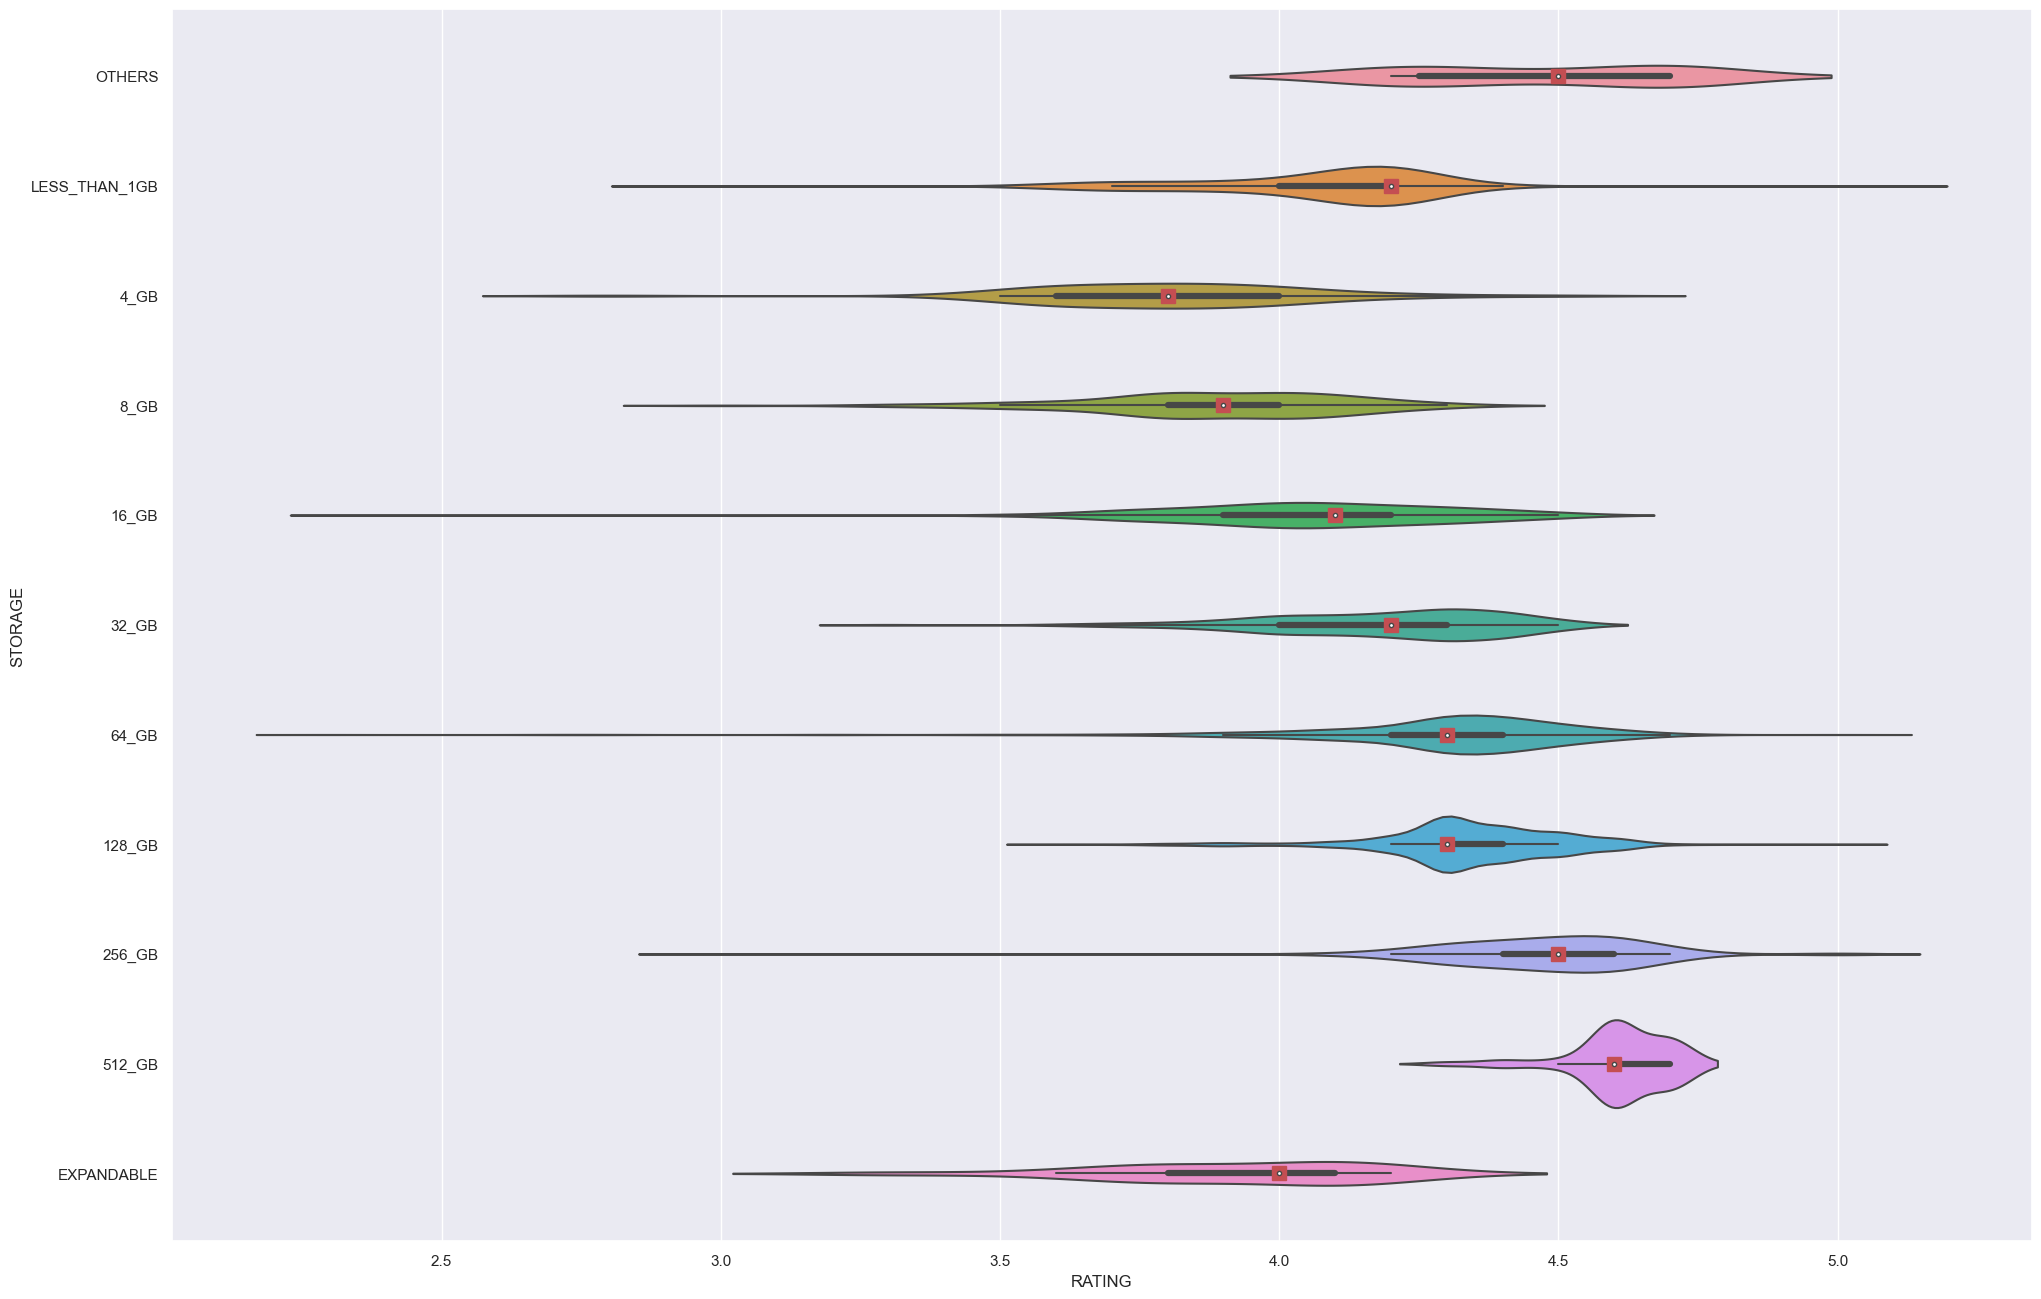

In [16]:
# Define the custom order for STORAGE types
storage_order = ['OTHERS', 'LESS_THAN_1GB', '4_GB', '8_GB', '16_GB', '32_GB', '64_GB', '128_GB', '256_GB', '512_GB', 'EXPANDABLE']

# Plot the violin plot with the specified order
plt.figure(figsize=(24, 16))
sb.violinplot(x="RATING", y="STORAGE", data=sales_Df, order=storage_order)

# Calculate median ratings for each storage
median = sales_Df.groupby('STORAGE')['RATING'].median().reset_index()

# Create a mapping between categories and their positions based on the specified order
category_positions = {category: pos for pos, category in enumerate(storage_order)}

# Plot the median points
for i, row in median.iterrows():
    category = row['STORAGE']
    rating = row['RATING']
    plt.plot(rating, category_positions[category], 'rs', markersize=10)  # Plot at the correct y-coordinate

plt.show()

`STORAGE`
* Some storage types such as `64_GB` have ratings that are very widely spread out in contrast to storage types like `512_GB` that has most data clustered together

# Machine Learning

### Data Preparation 
* Separate predictors and response variables
* Utilise one-hot encoding for categorical variables
* Split dataset into train and test sets

In [3]:
# Separate predictors and response variables
x = sales_Df[['SELLING_PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'DISCOUNT_PERCENTAGE', 'BRANDS', 'COLORS', 'MEMORY', 'STORAGE']]
y = sales_Df['RATING']

In [4]:
# Utilise one-hot encoding for categorical variables
x_Encoded = pd.get_dummies(x, columns=['BRANDS', 'COLORS', 'MEMORY', 'STORAGE'])

In [5]:
# Split dataset into train and test sets
x_Train, x_Test, y_Train, y_Test = train_test_split(x_Encoded, y, test_size=0.2, random_state=10)

# Check the sample sizes
print("Train Set :", x_Train.shape, y_Train.shape)
print("Test Set  :", x_Test.shape, y_Test.shape)

Train Set : (2317, 55) (2317,)
Test Set  : (580, 55) (580,)


### Decision Tree Regressor

* Create and train model
* Plot trained tree model
* Goodness of Fit of Model: Using model to predict `RATING` using Categorical Variables
> Mean Squared Error (MSE)  
> Explained Variance (R^2) 

In [6]:
# Create and Train Decision Tree Model
# Decision Tree using Train Data
dtc_Train = DecisionTreeRegressor(random_state=10)
dtc_Train.fit(x_Train, y_Train)

# Goodness Fit of Model: Using Decison Tree Model to predict `RATING` using Categorical Variables
y_Predict = dtc_Train.predict(x_Test)

print("Goodness of Fit of Model for Decision Tree Regressor WITHOUT maximum depth:\n")
mse = mean_squared_error(y_Test, y_Predict)
print("Mean Squared Error:", mse)
r_Squared = dtc_Train.score(x_Test, y_Test)
print("R-Squared (R^2):", r_Squared)

Goodness of Fit of Model for Decision Tree Regressor WITHOUT maximum depth:

Mean Squared Error: 0.03953017241379311
R-Squared (R^2): 0.47625988761088844


In [7]:
# Create and Train Decision Tree Model
# Decision Tree using Train Data
dtc_Train = DecisionTreeRegressor(max_depth=9,random_state=10)
dtc_Train.fit(x_Train, y_Train)

# Goodness Fit of Model: Using Decison Tree Model to predict `RATING` using Categorical Variables
y_Predict = dtc_Train.predict(x_Test)

print("Goodness of Fit of Model for Decision Tree Regressor WITH maximum depth:\n")
mse = mean_squared_error(y_Test, y_Predict)
print("Mean Squared Error:", mse)
r_Squared = dtc_Train.score(x_Test, y_Test)
print("R-Squared (R^2):", r_Squared)

Goodness of Fit of Model for Decision Tree Regressor WITH maximum depth:

Mean Squared Error: 0.02904957773995813
R-Squared (R^2): 0.6151185744620433


##### Decision Tree model seems to perform better when a maximum depth of 9 is imposed as opposed to when no maximum depth was imposed. This could be suggesting that there was overfitting of data when there was no maximum depth which caused the model to perform poorly (as seen from lower R^2 value and higher MSE). Different values for max_depth was tried out but the model performed best when max_depth=9

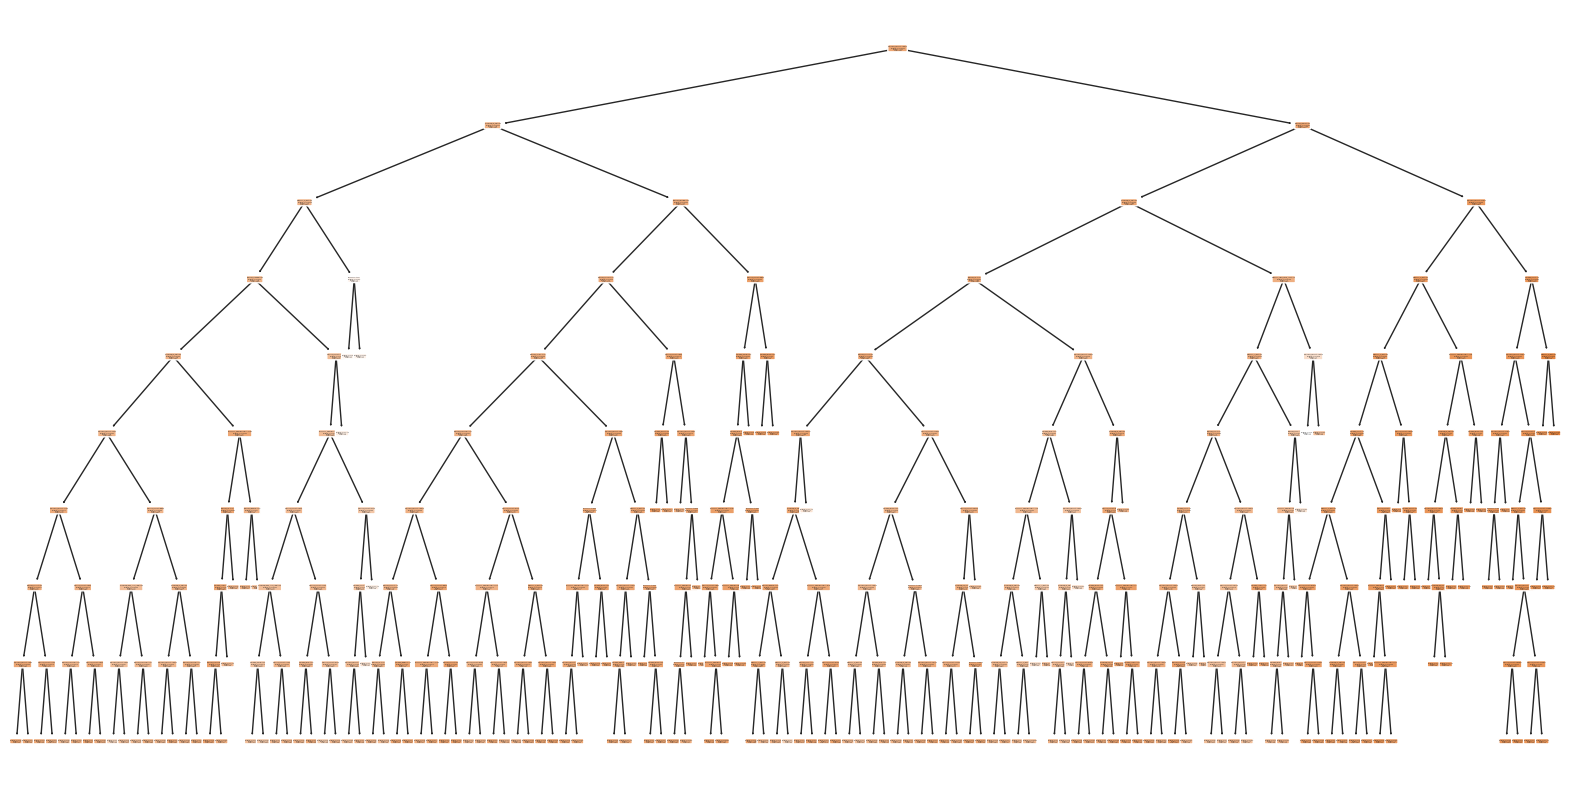

In [22]:
# Plot Trained Decision Tree with maximum depth of 9

# Convert Index object to list
feature_Names_List = x_Encoded.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(dtc_Train, feature_names=feature_Names_List, filled=True, rounded=True)
plt.show()

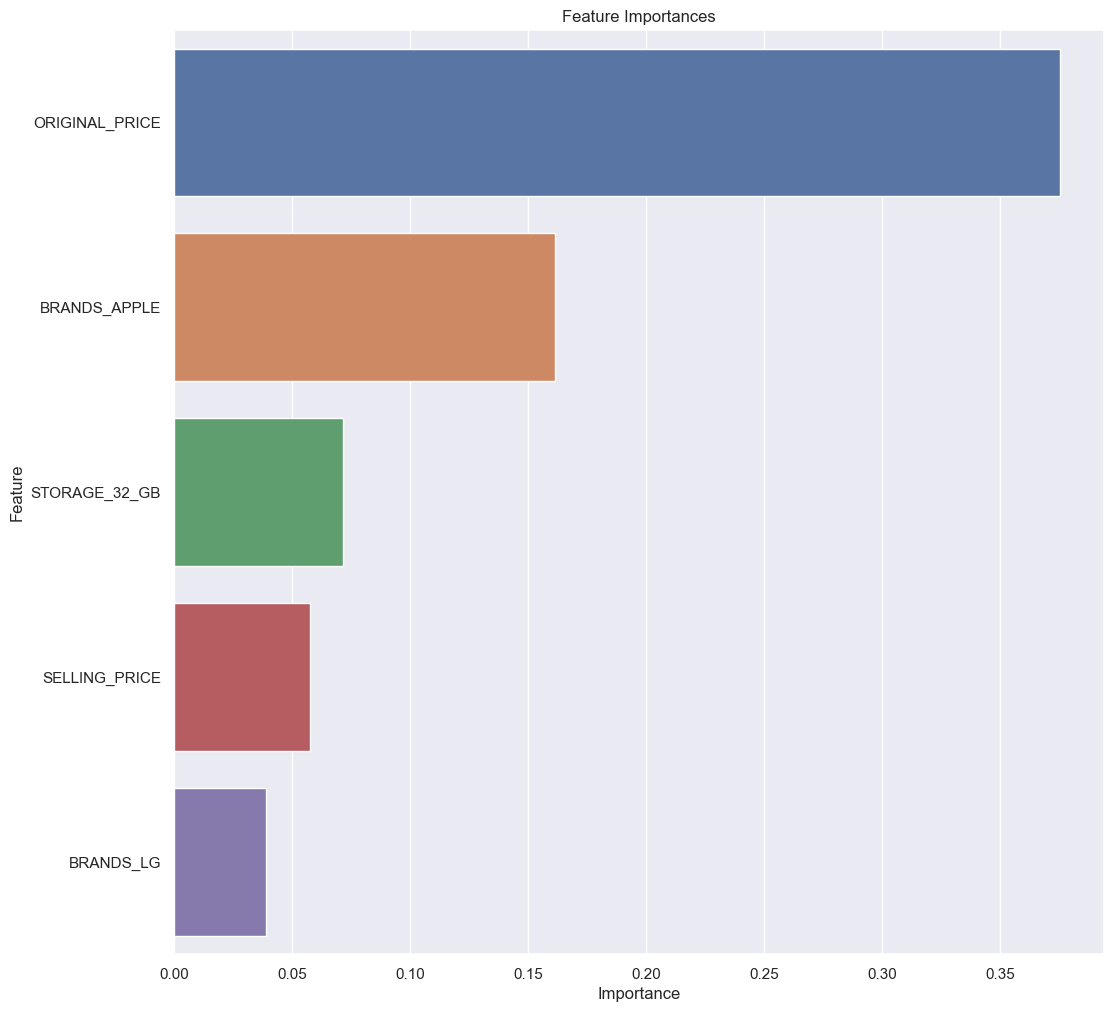

In [8]:
# Get feature importances
feature_importance = dtc_Train.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x_Train.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in predicting RATING
plt.figure(figsize=(12, 12))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(5,'Importance'))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Top 5 Features to predict `RATING` based on Decision Tree Model

1. `ORIGINAL_PRICE`
2. `BRANDS_APPLE`
3. `SELLING PRICE`
4. `MEMORY_1_GB`
5. `BRANDS_REALME`

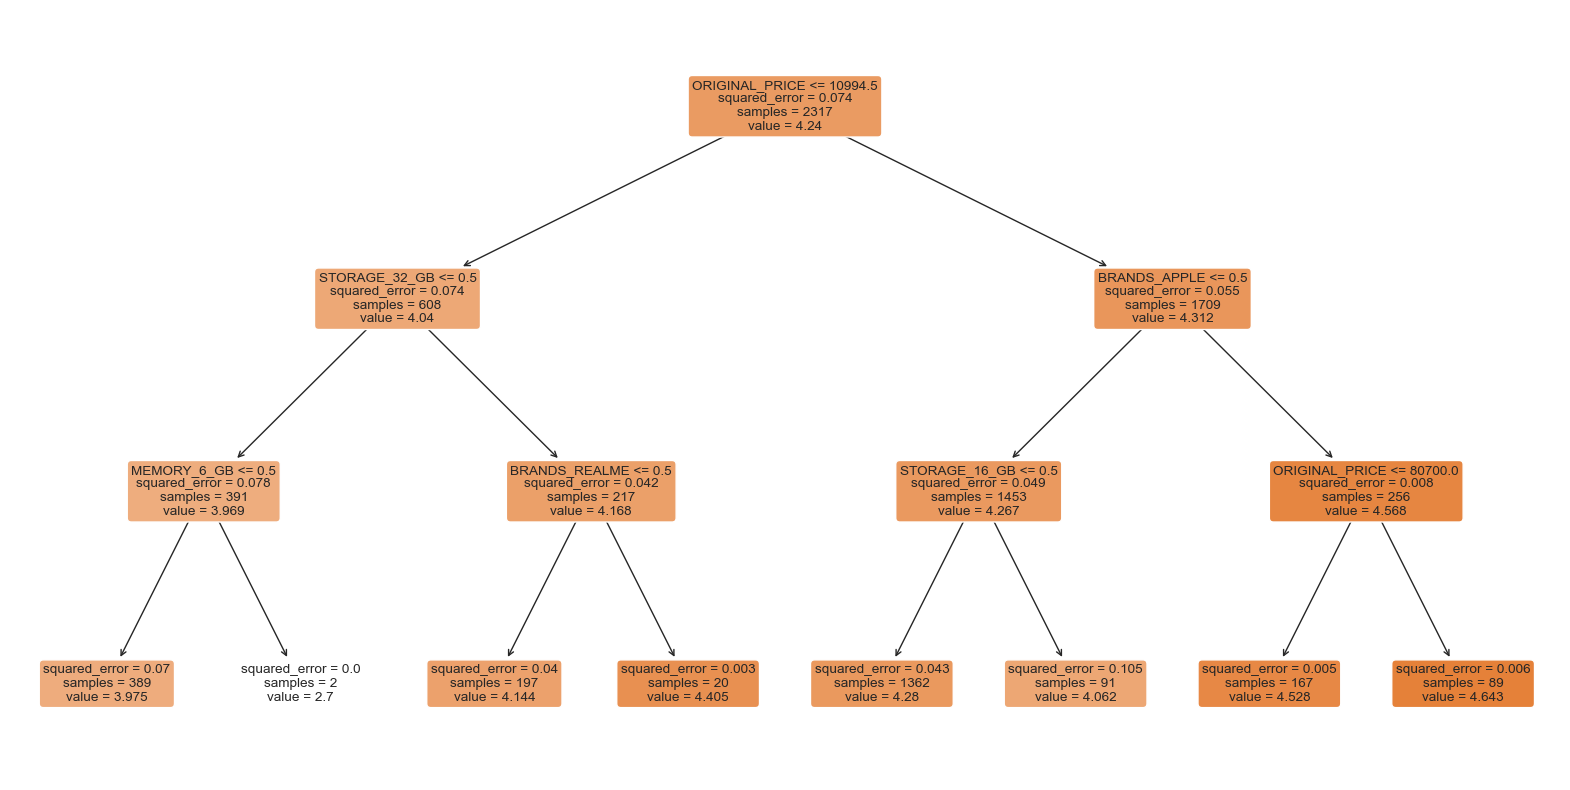

In [24]:
#we know that the original price, apple brand and selling price significantly affect rating but HOW?
#is the rating higher or lower when the brand is apple?
#is the rating higher or lower when original or selling price is high/low?
#set the max depth to 3 and then visualise tree 
# important features will appear at the top nodes of the decision tree regardless of the max depth chosen
#NOTE: all insights from ML will be at the bottom of notebook!!!

# Create and Train Decision Tree Model
# Decision Tree using Train Data
dtc_Train = DecisionTreeRegressor(max_depth=3,random_state=10)
dtc_Train.fit(x_Train, y_Train)

# Plot Trained Decision Tree with maximum depth of 3

# Convert Index object to list
feature_Names_List = x_Encoded.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(dtc_Train, feature_names=feature_Names_List, filled=True, rounded=True)
plt.show()

### Gradient Boosting Regressor

* Create and train model
* Plot trained tree model
* Goodness of Fit of Model: Using model to predict `RATING` using Categorical Variables
> Mean Squared Error (MSE)  
> Explained Variance (R^2) 

In [9]:
# Create and Train Model
gbr = GradientBoostingRegressor(random_state=10, max_depth=None)
gbr.fit(x_Train, y_Train)

# Goodness Fit of Model: Using Decison Tree Model to predict `RATING` using Categorical Variables
y_Predict = gbr.predict(x_Test)

mse = mean_squared_error(y_Test, y_Predict)
r_Squared = r2_score(y_Test, y_Predict)

print("Goodness of Fit of Model for Gradient Boosting Regression:\n")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_Squared)

Goodness of Fit of Model for Gradient Boosting Regression:

Mean Squared Error (MSE): 0.0388480012631452
R-Squared (R^2): 0.4852980570215607


In [10]:
# Create and Train Model
gbr = GradientBoostingRegressor(max_depth=12,random_state=10)
gbr.fit(x_Train, y_Train)

# Goodness Fit of Model: Using Decison Tree Model to predict `RATING` using Categorical Variables
y_Predict = gbr.predict(x_Test)

mse = mean_squared_error(y_Test, y_Predict)
r_Squared = r2_score(y_Test, y_Predict)

print("Goodness of Fit of Model for Gradient Boosting Regression:\n")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_Squared)

Goodness of Fit of Model for Gradient Boosting Regression:

Mean Squared Error (MSE): 0.023444001424005625
R-Squared (R^2): 0.6893875439719842


##### Decision Tree model seems to perform better when a maximum depth of 12 is imposed as opposed to when no maximum depth was imposed. This could be suggesting that there was overfitting of data when there was no maximum depth which caused the model to perform poorly (as seen from lower R^2 value and higher MSE). Different values for max_depth was tried out but the model performed best when max_depth=12.

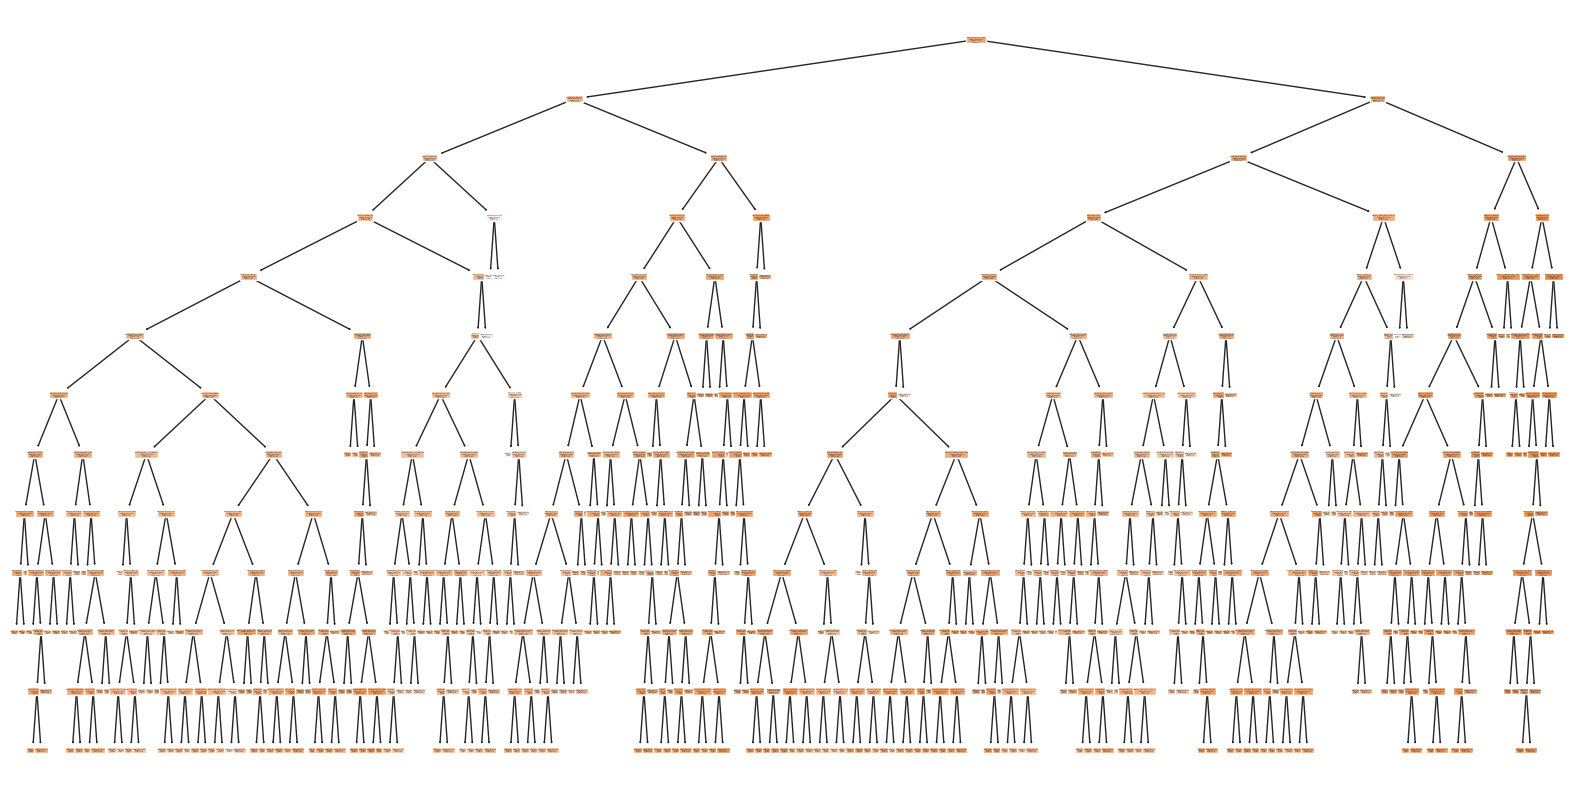

In [27]:
# Convert Index object to a list
feature_names_list = x_Train.columns.tolist()

#gradient boosting regressor utilises multiple decision trees to improve performance of model
#impractical to visualise every single one of them
# randomly select a tree to visualise
plt.figure(figsize=(20, 10))
plot_tree(gbr.estimators_[0][0], filled=True, feature_names=feature_names_list) 
plt.show()

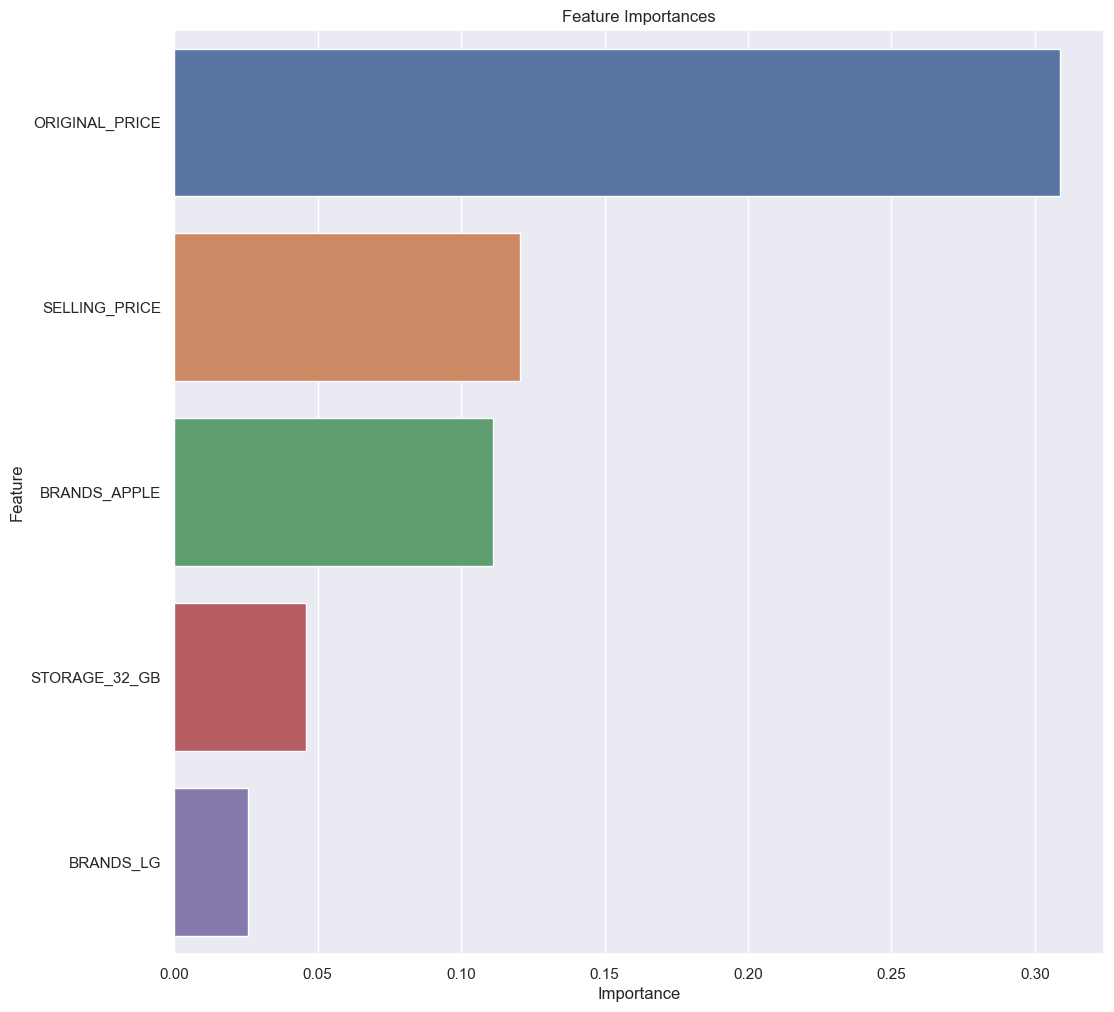

In [11]:
# Get feature importances
feature_importance = gbr.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x_Train.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in predicting RATING
plt.figure(figsize=(12, 12))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(5,'Importance'))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Top 5 Features to predict `RATING` based on Gradient Boosting Regressor Model

1. `ORIGINAL_PRICE`
2. `SELLING_PRICE`
3. `BRANDS_APPLE`
4. `STORAGE_32_GB`
5. `BRANDS_LG`

##### 2nd and 3rd features are `SELLING_PRICE` and `BRANDS_APPLE` for Gradient Boosting Regressor but the order of these 2 variables is swapped for Decision Tree Model (ie. `BRANDS_APPLE` is 2nd and `SELLING_PRICE` is 3rd). Last 2 variables are also different for both models.

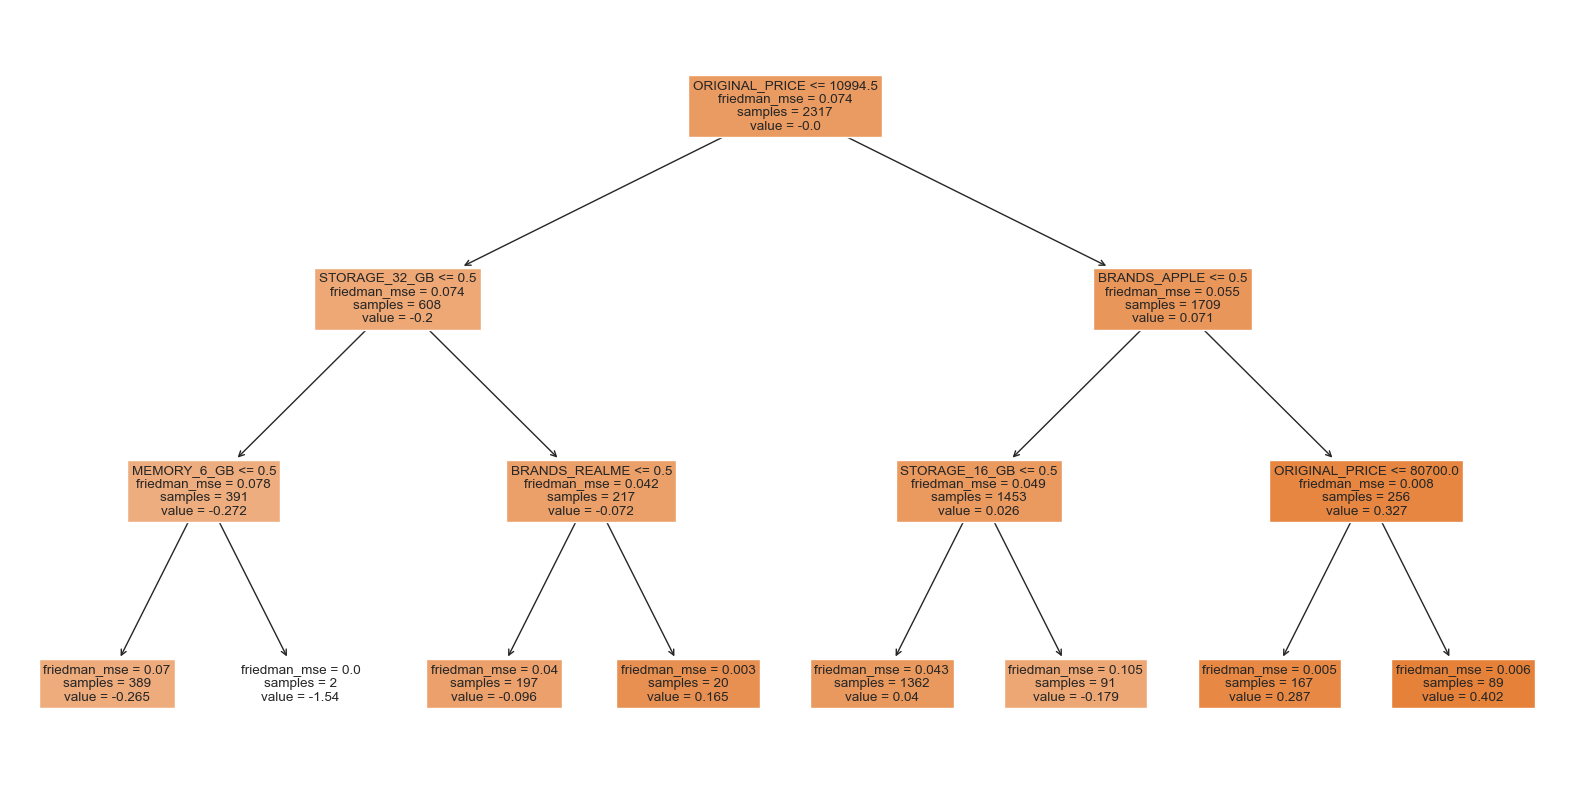

In [29]:
#same thing as decision tree regressors, we want to know HOW the most important features affect RATING

# Create and Train Model
gbr = GradientBoostingRegressor(max_depth=3,random_state=10)
gbr.fit(x_Train, y_Train)

# Convert Index object to a list
feature_names_list = x_Train.columns.tolist()


plt.figure(figsize=(20, 10))
plot_tree(gbr.estimators_[0][0], filled=True, feature_names=feature_names_list) 
plt.show()

### Random Forest Regressor

* Create and train model
* Plot trained tree model
* Goodness of Fit of Model: Using model to predict `RATING` using Categorical Variables
> Mean Squared Error (MSE)  
> Explained Variance (R^2) 

In [12]:
# Create and Train Model
model = RandomForestRegressor(random_state=42)
model.fit(x_Train, y_Train)
# Goodness Fit of Model: Using Model to predict `RATING` using Categorical Variables
y_Predict = model.predict(x_Test)

mse = mean_squared_error(y_Test, y_Predict)
r_Squared = r2_score(y_Test, y_Predict)

print("Goodness of Fit of Model for Random Forest Regressor WITHOUT maximum depth:\n")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_Squared)

Goodness of Fit of Model for Random Forest Regressor WITHOUT maximum depth:

Mean Squared Error (MSE): 0.022248262860777766
R-Squared (R^2): 0.7052300311470322


##### Although not imposing maximum depth can risk overfitting of data, this model seems to be performing well. Accuracy of prediction of test data of response variable `RATING` is rather high (as seem from large R^2 value) and error between predicted and actual values is quite low (as seen from small MSE value)

In [13]:
# Create and Train Model
model = RandomForestRegressor(max_depth=19,random_state=42)
model.fit(x_Train, y_Train)
# Goodness Fit of Model: Using Model to predict `RATING` using Categorical Variables
y_Predict = model.predict(x_Test)

mse = mean_squared_error(y_Test, y_Predict)
r_Squared = r2_score(y_Test, y_Predict)

print("Goodness Fit of Model for Random Forest Regressor WITH maximum depth:\n")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_Squared)

Goodness Fit of Model for Random Forest Regressor WITH maximum depth:

Mean Squared Error (MSE): 0.021915438354778872
R-Squared (R^2): 0.7096396639296327


##### After trying out different values for max_depth, tree model of maximum depth 19 seems to have the highst R^2 value and lowest MSE.

In [32]:
print("\nRandom Forest Regression Model:")
print("Number of Estimators:", model.n_estimators)
print("Max Depth:", model.max_depth)
print("Criterion:", model.criterion)
print("Min Samples Split:", model.min_samples_split)


Random Forest Regression Model:
Number of Estimators: 100
Max Depth: 19
Criterion: squared_error
Min Samples Split: 2


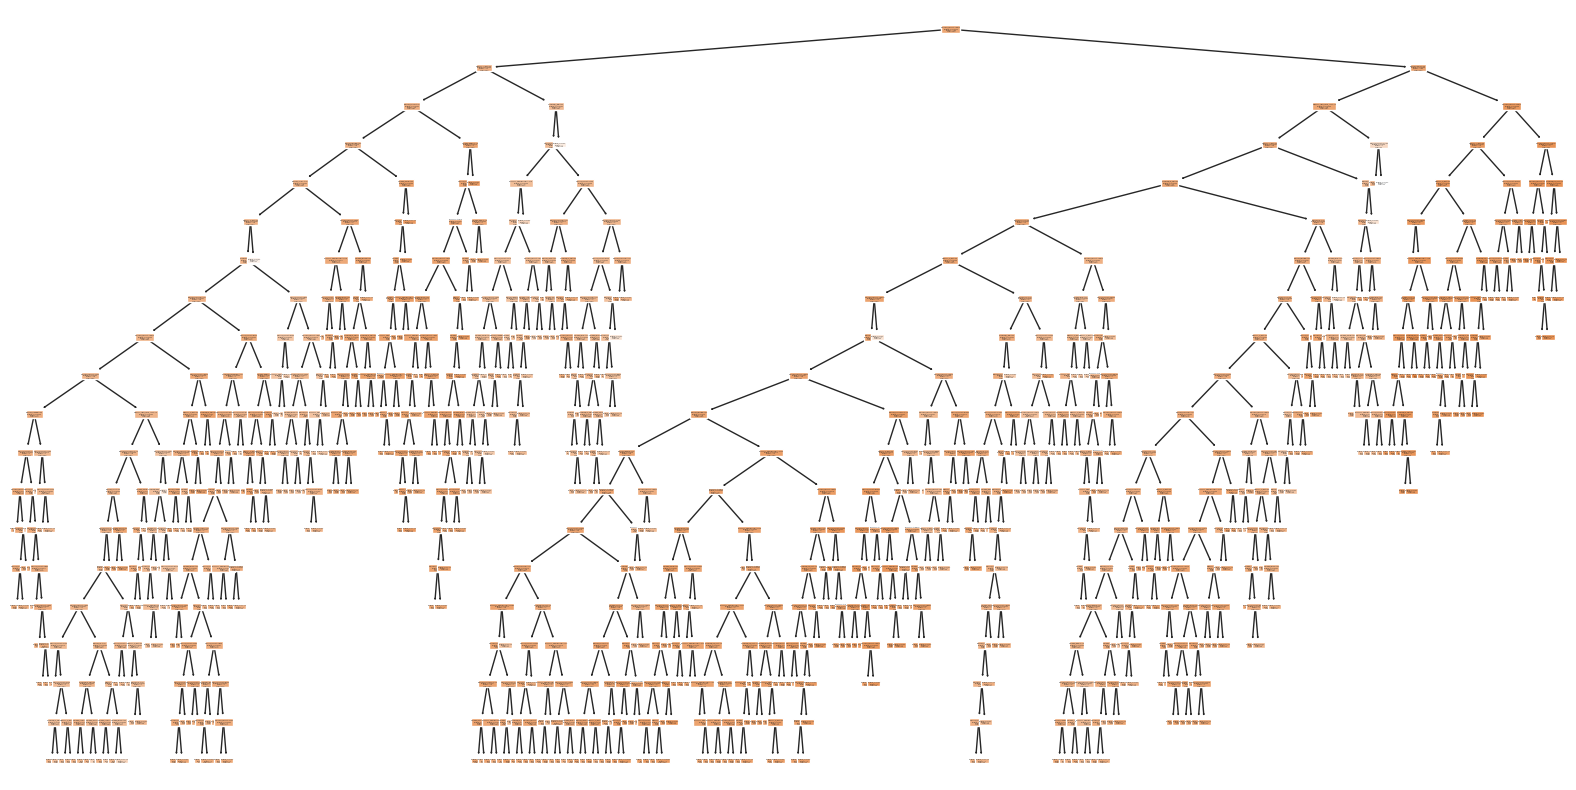

In [33]:
#random forest is an ensemble of numerous individual decision tree models
#it is impractical to visualise every single tree
#visualise randomly chosen tree (with max depth)
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=feature_names_list, filled=True)
plt.show()

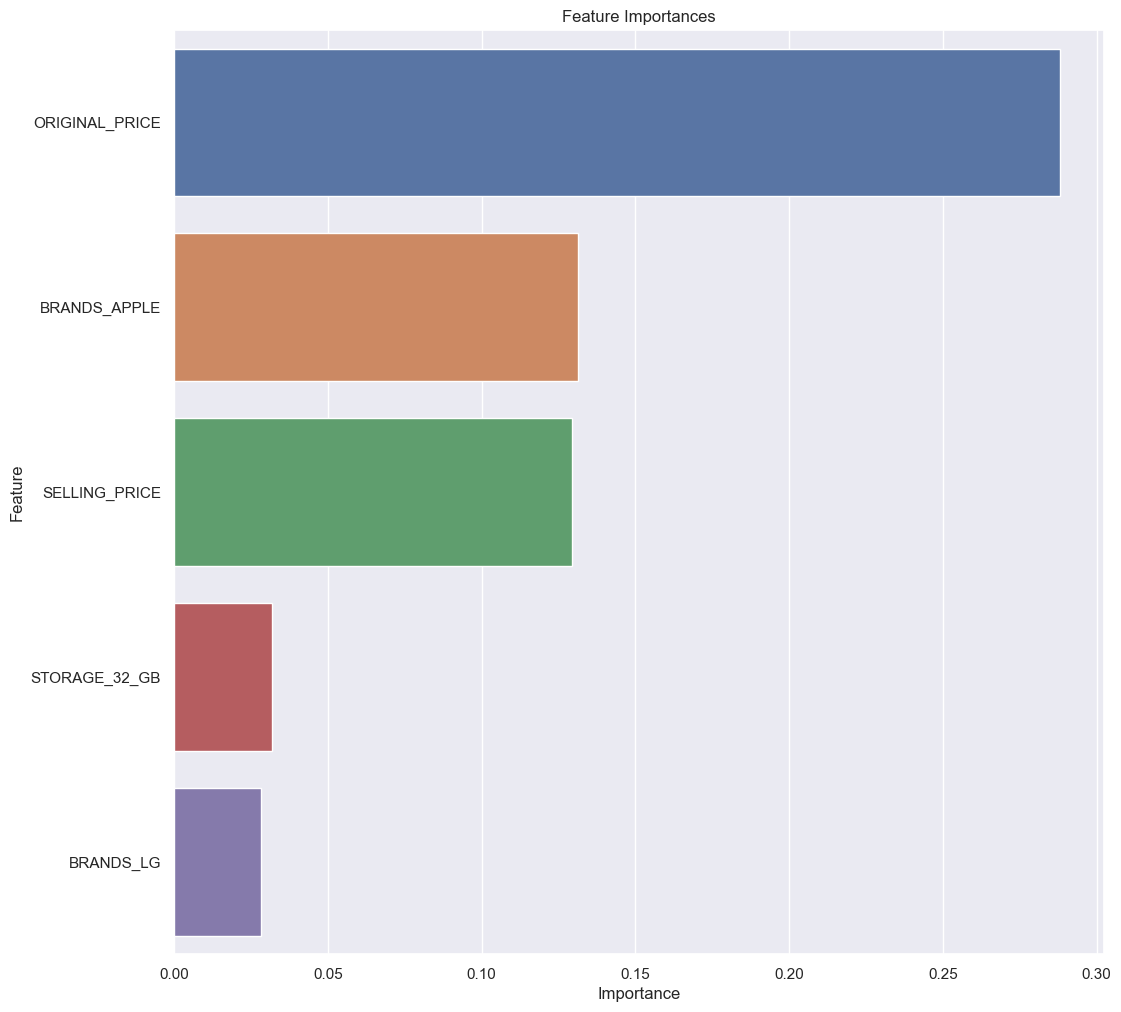

In [14]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x_Train.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in predicting RATING
plt.figure(figsize=(12, 12))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(5,'Importance'))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Top 5 Features to predict `RATING` based on Random Forest Regressor Model

1. `ORIGINAL_PRICE`
2. `BRANDS_APPLE`
3. `SELLING PRICE`
4. `STORAGE_32_GB`
5. `BRANDS_LG`

##### Top 3 features are in the same order as Decision Tree Model. However, last 2 variables are different from Decision Tree but the same as Gradient Boosting Regressor

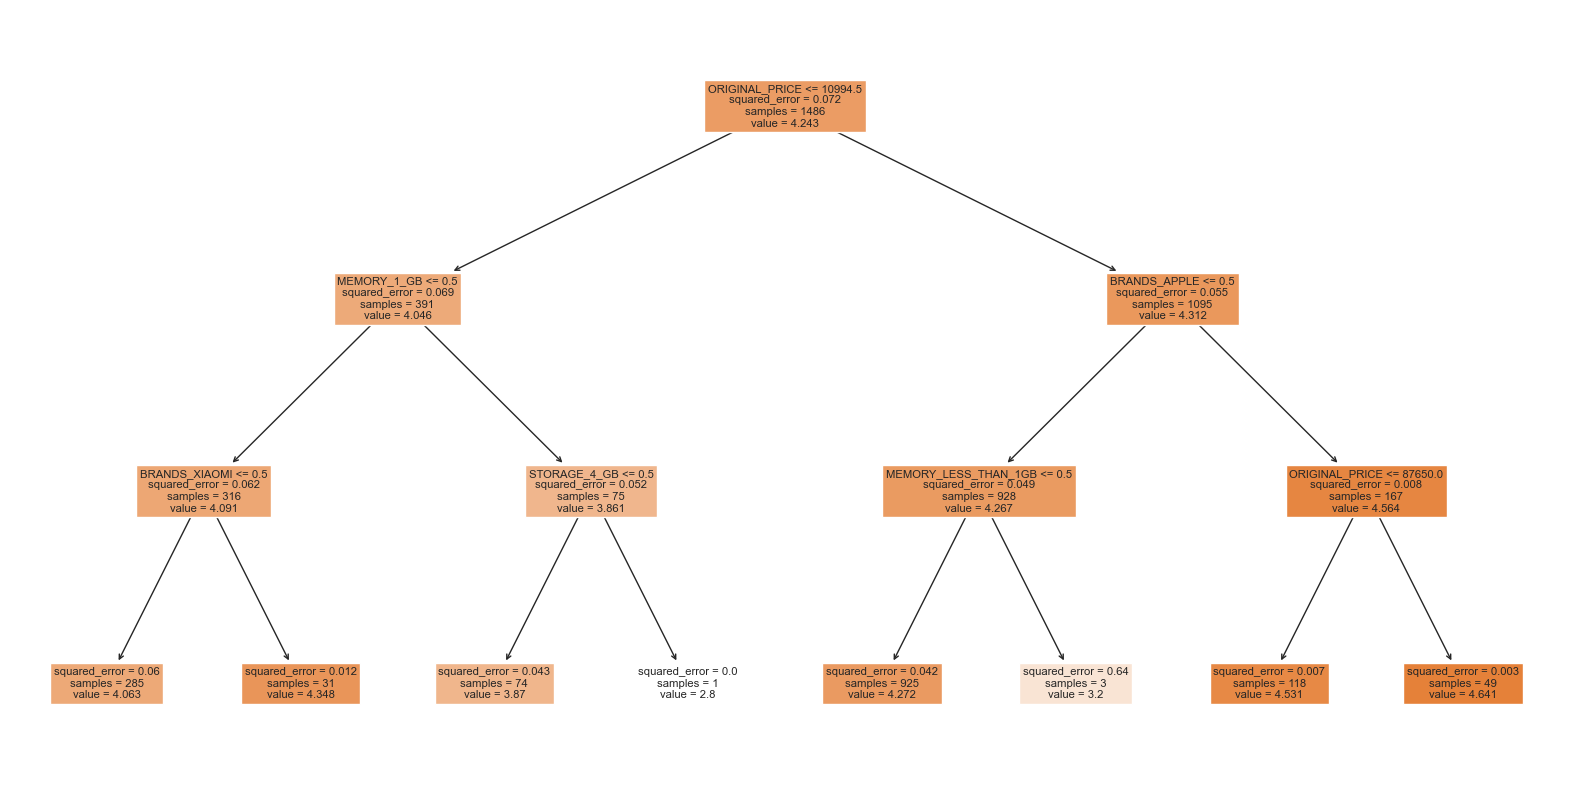

In [35]:
#same thing as decision tree and gradient boosting regressor, we want to know HOW most important features affect rating
# Create and Train Model
model = RandomForestRegressor(max_depth=3,random_state=42)
model.fit(x_Train, y_Train)

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=feature_names_list, filled=True)
plt.show()

### K-Nearest Neighbors

* Create and train model
* Compare model with actual ratings (K-Nearest Neighbors doesn't have an available visualisation that we can plot, so we have used a scatter plot to visualise the actual ratings against the predicted ratings for this model.)
* Goodness of Fit of Model: Using model to predict `RATING` using Categorical Variables
> Mean Squared Error (MSE)  
> Explained Variance (R^2) 

In [15]:
# Create and Train Model
kmodel = KNeighborsRegressor()
kmodel.fit(x_Train, y_Train)

print("K-Nearest Neighbors Regression Model:")
print("Number of neighbors (K):", kmodel.n_neighbors)
print("Weights:", kmodel.weights)
print("Algorithm:", kmodel.algorithm)
print("Leaf size:", kmodel.leaf_size)
# Goodness Fit of Model: Using Model to predict `RATING` using Categorical Variables
y_Predict = kmodel.predict(x_Test)

mse = mean_squared_error(y_Test, y_Predict)
r_Squared = r2_score(y_Test, y_Predict)

print("Goodness Fit of Model for K-Nearest Neighbors:\n")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R^2):", r_Squared)

K-Nearest Neighbors Regression Model:
Number of neighbors (K): 5
Weights: uniform
Algorithm: auto
Leaf size: 30
Goodness Fit of Model for K-Nearest Neighbors:

Mean Squared Error (MSE): 0.04134896551724139
R-Squared (R^2): 0.45216247426188516


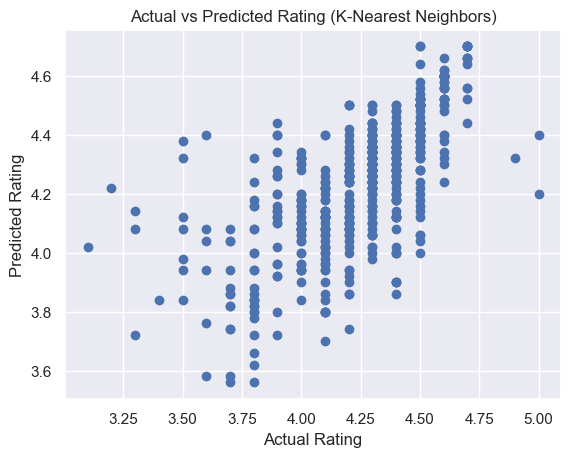

In [38]:
#visualise Model Predictions vs Actual Ratings
import matplotlib.pyplot as plt


plt.scatter(y_Test, y_Predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating (K-Nearest Neighbors)")
plt.show()


##### K-Nearest Neighbors regression does not provide feature importances, thus, we used permutation feature importance, which assesses the changes in a model's performance when the values of each feature are randomly shuffled to deem the importance of each feature based on whether the performance was better or worse

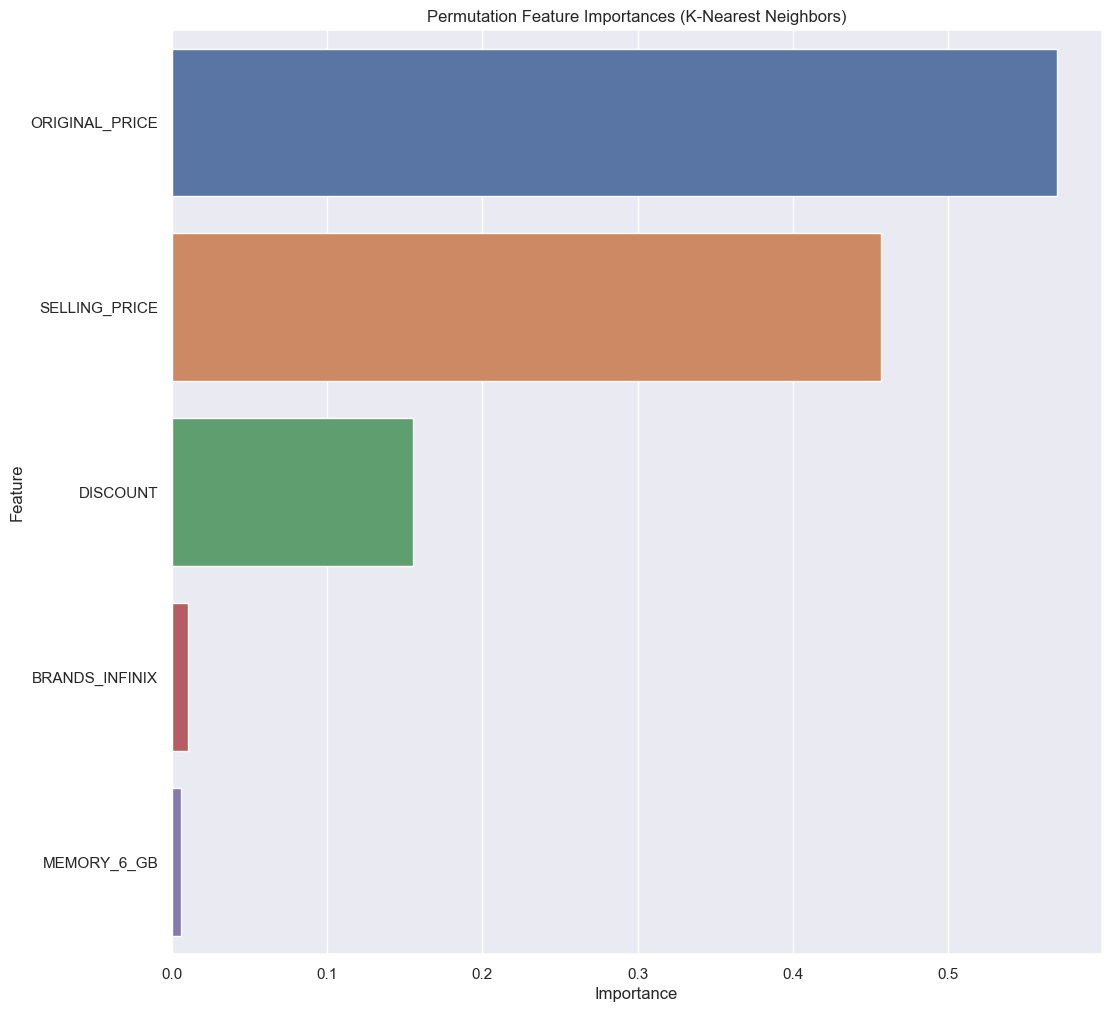

In [16]:
from sklearn.inspection import permutation_importance

# Get permutation feature importances
result = permutation_importance(kmodel, x_Test, y_Test, n_repeats=10, random_state=42)

# Get feature importances
feature_importance = result.importances_mean

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x_Train.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in predicting Rating
plt.figure(figsize=(12, 12))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df.nlargest(5,'Importance'))
plt.title('Permutation Feature Importances (K-Nearest Neighbors)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#### Top 5 Features to predict `RATING` based on K-Nearest Neighbors Model

1. `ORIGINAL_PRICE`
2. `SELLING_PRICE`
3. `DISCOUNT`
4. `MEMORY_6_GB`
5. `COLORS_WHITE`

##### Similar to all the other models,  `SELLING_PRICE` and `ORIGINAL_PRICE` rank highly, but unlike the other models, `BRANDS_APPLE` is not in the top 5 features, and instead there are the new features of `DISCOUNT`, `MEMORY_6_GB` and `COLORS_WHITE`. These differences are likely in part due to permutation feature importances being used instead of feature importances as they are two different techniques to assess the importance of features in a machine learning model. 

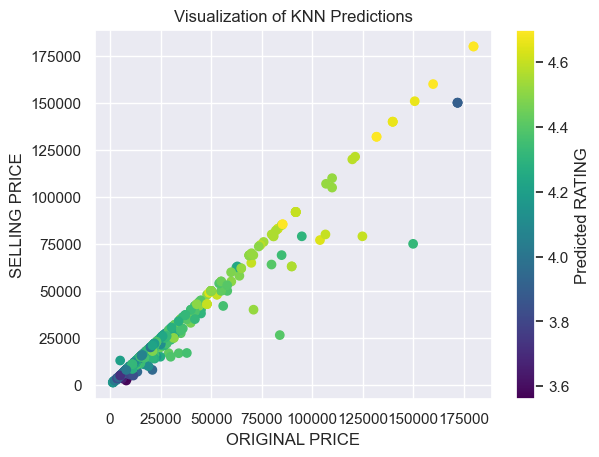

In [40]:
#use a scatter plot to see HOW our top 2 most important features affect rating (how the K-Nearest Neighbors partitions the feature space)

plt.scatter(x_Test['ORIGINAL_PRICE'], x_Test['SELLING_PRICE'], c=y_Predict, cmap='viridis')
plt.colorbar(label='Predicted RATING')
plt.xlabel('ORIGINAL PRICE')
plt.ylabel('SELLING PRICE')
plt.title('Visualization of KNN Predictions')
plt.show()

# Insights

## Best Model

#### Random Forest Regressor
* Highest R-Squared value of 0.71(3 s.f)
* Lowest Mean Squared Error (MSE) of 0.22 (3 s.f)

#### Top 5 features
* `ORIGINAL_PRICE`
* `BRANDS_APPLE`
* `SELLING_PRICE`
* `STORAGE_32_GB`
* `BRANDS_LG`

#### Comments
* As mentioned in the EDA section, even though `ORIGINAL_PRICE` and `SELLING_PRICE` have high positive correlation with `RATING`, both variables rank differently for feature importances. `ORIGINAL_PRICE` had greater importance in predicting `RATING` than `SELLING_PRICE` which could be suggesting that discounts are less relevant and maybe phone purchases have urgency that is unaffected by discounts
* During EDA, it was inferred that brands and storage would be key features determining `RATING` and it is confirmed
* Apple and LG brands made it to the top 5 features while other brands did not. Maybe, brand loyalty and reputation plays a part in predicting rating

## Recommendation

#### Top 5 ideal features
* `ORIGINAL_PRICE`
* `BRANDS_APPLE`
* `SELLING_PRICE`
* `STORAGE_32_GB`
* `BRANDS_LG`

##### A smartphone with a reasonable original price (>= 10994.5 INR and <= 87650 INR according to decision tree of random forest regressor) is a desirable trait. This means that price cannot be so high that it is unaffordable but at the same time not too low to the point it compromises the quality and functions of the phone. As such, smartphone companies should allocate more funds to R&D to reduce production costs while still maintaining the quality in their products and ensuring their phones have a decently large storage (4GB seems to be the optimal storage based on decision tree of random forest regressor). 

##### As mentioned earlier, brand reputation and loyalty could be causing phone users to give their phones of a particular brand a higher rating. Hence, phone companies should focus more on advertising, building brand image and customer loyalty.

##### Discounts may be less relevant but selling price is still one of the top features. Thus, offering discounts for purchasing smartphones could also increase customer satisfaction and cause users to give higher ratings for their phone

# The End :)